# Проект "Сегментация пользователей по потреблению продуктов банка "Метанпром"

Данное исследование проводится на основе данных о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Основной целью исследования является подготовка рекомендаций  для снижения оттока клиентов банка. 

Задачами исследования являются:
- подготовка данных,
- сегментация клиентов в разрезе числа используемых продуктов,
- сформулировать и проверить статистические гипотезы,
- дать рекомендации по предложению продукта банка интересного определённым сегментам пользователей.

### Загрузка данных и библиотек

In [1]:
import pandas as pd
import scipy.stats as stats

from datetime import datetime, timedelta
import seaborn as sns


from collections import Counter
from scipy import stats as st
import time
from datetime import datetime
from datetime import date, timedelta as td
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import math as mth
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [3]:
pd.set_option('display.max_colwidth', 0)
display(df.head()) # посмотрим содержание датафрейма

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
df.info()# ознакомимся с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Всего представлено 10000 строк датафрейма.

In [5]:
df.describe()# ознакомимся с данными

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


В данных есть пропуски, возможно есть выбросы. Проверим это на следующем этапе.

### Подготовьте данных к анализу

#### Изучение общей информации о полученном датафрейме 

Построим общую гистограмму для всех числовых столбцов таблицы

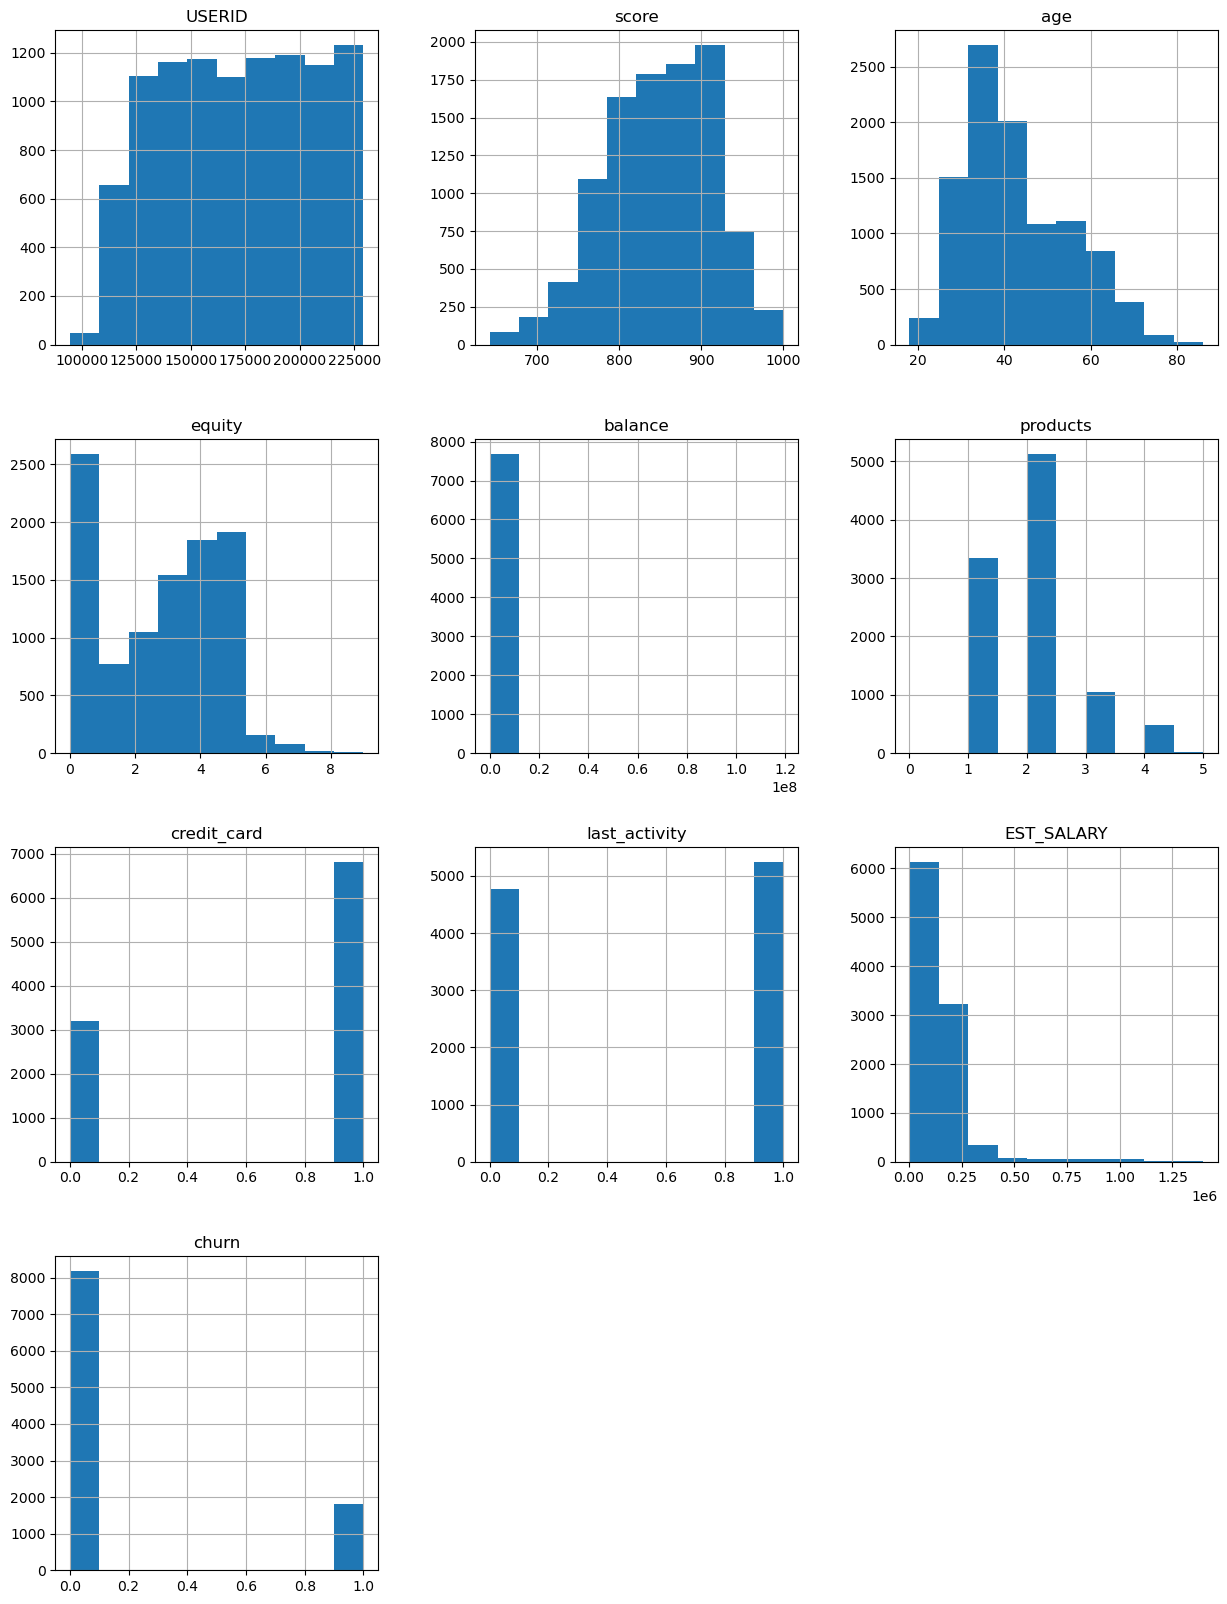

In [6]:
df.hist(figsize=(15, 20));

Изучим данные столбцов

In [7]:
df['score'].value_counts()

900.0    80
889.0    75
894.0    70
899.0    70
908.0    68
         ..
666.0    1 
667.0    1 
684.0    1 
673.0    1 
995.0    1 
Name: score, Length: 348, dtype: int64

Всего представлено 348 различных оценок  баллов кредитного скоринга. Больше всего присваивали 900 баллов(80 раз).

In [8]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [9]:
print('Количество уникальных занчений name:', df['city'].unique().shape[0])

Количество уникальных занчений name: 3


Всего представлено 3 города: Ярославль, Рыбинск и Ростов.

In [10]:
df['age'].describe()

count    9974.000000
mean     42.734409  
std      12.179971  
min      18.000000  
25%      33.000000  
50%      40.000000  
75%      51.000000  
max      86.000000  
Name: age, dtype: float64

Средний возраст клиента 42 года. Минимальный 18, а максимальный 86. 

In [11]:
df['equity'].value_counts()

0    2592
5    1918
4    1850
3    1543
2    1052
1    774 
6    161 
7    80  
8    17  
9    13  
Name: equity, dtype: int64

Большинство клиентов не имеют объектов в собственности.

In [12]:
df['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

Максимальный баланс на счёте 119 113 600 руб., а минимальный 0. Среднее значение 640 191.9 руб.

In [13]:
df['products'].value_counts()

2    5126
1    3341
3    1039
4    474 
5    19  
0    1   
Name: products, dtype: int64

Большенство пользуется двумя продуктами банка

In [14]:
df['credit_card'].value_counts()

1    6804
0    3196
Name: credit_card, dtype: int64

Большинство имеют кредитную карту

In [15]:
df['last_activity'].value_counts()

1    5235
0    4765
Name: last_activity, dtype: int64

Большинство являются активными клиентами

In [16]:
df['EST_SALARY'].describe()

count    1.000000e+04
mean     1.478669e+05
std      1.393885e+05
min      2.546300e+03
25%      7.525190e+04
50%      1.196581e+05
75%      1.745005e+05
max      1.395064e+06
Name: EST_SALARY, dtype: float64

Средняя заработная плата является 147 866.9 руб. Максимальная 1 395 064 руб.

In [17]:
df['churn'].value_counts()

0    8180
1    1820
Name: churn, dtype: int64

Большинство остаются клиентами банка.

#### Замена названия столбцов и значений

In [18]:
#Переименуем строку user_id и приведём строки к нижнему регистру.
df.columns = [x.lower().replace('id', '_id') for x in df.columns.values]

In [19]:
#  значения столбца 1 и 0 churn заменяем на более читаемые
df['churn'] = df['churn'].apply(lambda x: 'Ушёл в другой банк ' if x == 1 else 'Клиент')


In [20]:
#  значения столбца 1 и 0 last_activity заменяем на более читаемые
df['last_activity'] = df['last_activity'].apply(lambda x: 'Активный' if x == 1 else 'Не активный')

In [21]:
#  значения столбца 1 и 0 credit_card заменяем на более читаемые
df['credit_card'] = df['credit_card'].apply(lambda x: 'Есть карта' if x == 1 else 'Нет карты')

In [22]:
df # посмотрим содержание датафрейма

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,Нет карты,Активный,75719.14,Ушёл в другой банк
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,Есть карта,Не активный,86621.77,Клиент
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,Есть карта,Активный,107683.34,Клиент
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,Нет карты,Активный,174423.53,Ушёл в другой банк
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,Есть карта,Не активный,67353.16,Ушёл в другой банк
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,Нет карты,Активный,18943.64,Клиент
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,Есть карта,Не активный,196898.29,Клиент
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,Есть карта,Активный,108905.09,Клиент
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,Нет карты,Активный,86874.90,Клиент


#### Изменение типов данных 

In [23]:
df.info()# посмотрим тип данных столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  object 
 9   last_activity  10000 non-null  object 
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


Для анализа данных о клиентах изменим тип данных столбца "баллы кредитного скоринга" и "заработная плата клиента".

In [24]:
df['score'] = df['score'].astype('int64') # изменим тип данных столбца "баллы кредитного скоринга"

df['est_salary'] = df['est_salary'].astype('int64')# изменим тип данных столбца "заработная плата клиента"

#### Проверка пропусков и дубликатов

Посмотрим пропущенные значения

In [25]:
df.isna().mean()*100

user_id          0.00 
score            0.00 
city             0.00 
gender           0.00 
age              0.26 
equity           0.00 
balance          22.95
products         0.00 
credit_card      0.00 
last_activity    0.00 
est_salary       0.00 
churn            0.00 
dtype: float64

In [26]:
# пропущенные значения бары
def pass_value_barh(d):
    (
        (d.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = True)
        .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
        .set_title('Пропущенные значения' + "\n", fontsize = 22, color = 'SteelBlue')    
    );    

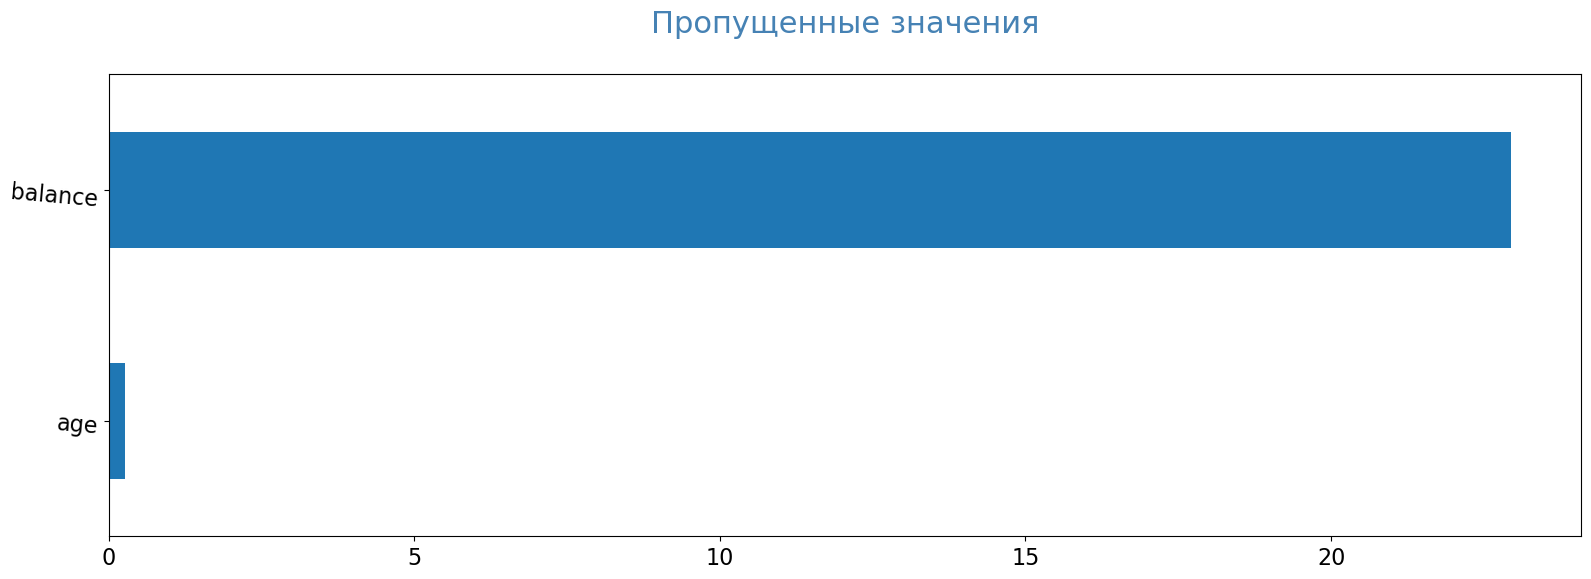

In [27]:
pass_value_barh(df)# построим график

22.95 % пропусков по столбцу Balance(баланс на счёте). Определим количество счётов с нулевым балансом.

In [28]:
print('Количество счётов с нулевым балансом:', df.query('balance == 0')['balance'].count()) # Количество счётов с нулевым балансом

Количество счётов с нулевым балансом: 2


Всего 2. Посмотрим пропуски баланса на счёте по городам. 

In [29]:
set_z = df # Присвоим другое имя для анализа пропусков

In [30]:
set_z['balance'] = set_z['balance'].fillna(0) # Заполнем '0' пустые значения баланса на счёте 


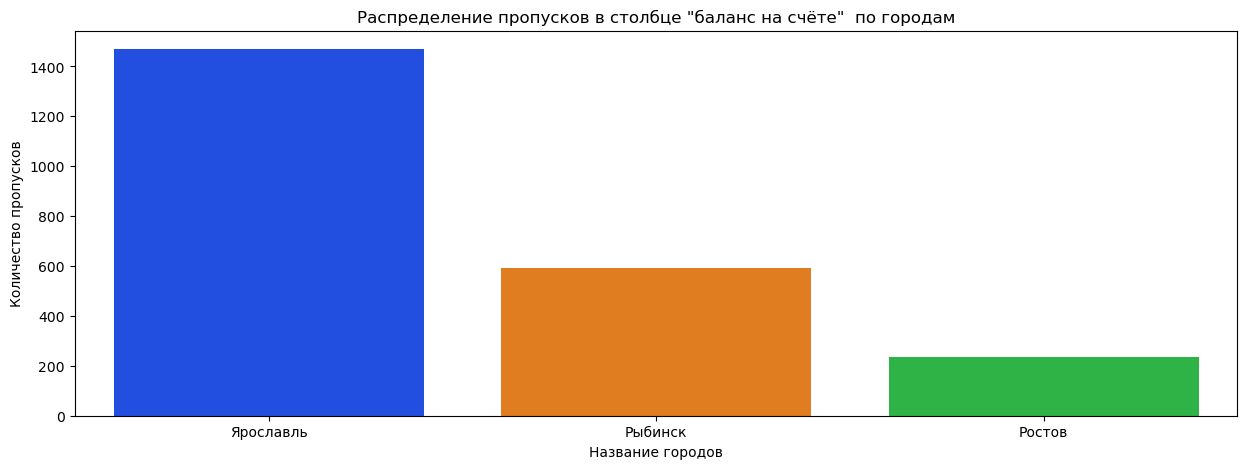

In [31]:
set_z = df.query('balance == 0') # расмотрим пропуски
# сгруппируем данные
propusk_gorod = set_z.groupby('city').agg({'balance':'count'}).reset_index()

propusk_gorod = propusk_gorod.sort_values('city', ascending=False).reset_index(drop=True)

plt.figure(figsize=(15, 5))
sns.barplot(data=propusk_gorod, x='city', y='balance', palette='bright')
plt.title('Распределение пропусков в столбце "баланс на счёте"  по городам')
plt.xlabel('Название городов')
plt.ylabel('Количество пропусков')
plt.show()

Большинство пропусков приходится на Ярославль. Меньше всего на Ростов.

Посмотрим пропуски баланса на счёте у мужчин и женщин. 

In [32]:
chain_df = set_z.groupby('balance').agg({'gender' : 'count'}).rename(columns={'gender': 'vsego'}).reset_index()
gender_m = set_z.query('gender == "Ж"')
gender_j = set_z.query('gender == "М"')
gender_m = gender_m.groupby('balance').agg({'gender' : 'count'}).reset_index()
gender_j = gender_j.groupby('balance').agg({'gender' : 'count'}).reset_index()
chain_df['m, %'] = round(gender_m['gender']/chain_df['vsego']*100,2)
chain_df['j, %'] = round(gender_j['gender']/chain_df['vsego']*100,2)
chain_df = chain_df.drop(columns=['vsego']).sort_values(by='m, %', ascending=False)


In [33]:
chain_df

,balance,"m, %","j, %"
0,0.0,44.1,55.9


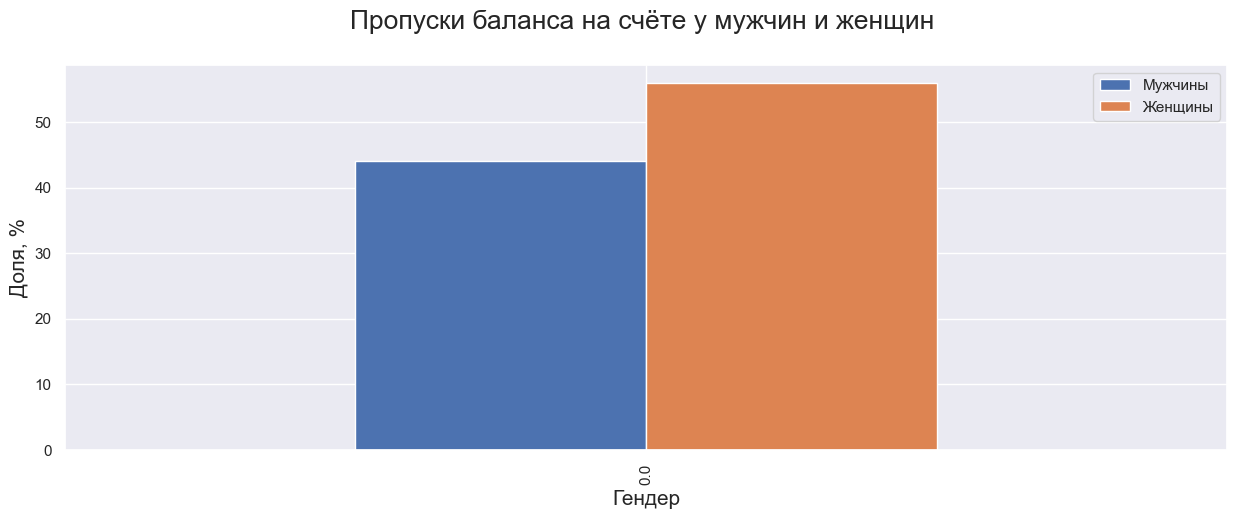

In [34]:
#Построим столбчатый график
sns.set()
chain_df.plot.bar(x='balance', figsize=(15,5))
plt.xlabel('Гендер', size=15)
plt.ylabel('Доля, %', size=15)
plt.title('Пропуски баланса на счёте у мужчин и женщин ' + '\n', size=19)
plt.legend(["Мужчины", "Женщины"])

plt.show()

Большинство пропусков у женщин.

Посмотрим пропуски баланса на счёте у активных и не активных клиентов

In [35]:
last_activ = set_z.groupby('balance').agg({'last_activity' : 'count'}).rename(columns={'last_activity': 'vsego'}).reset_index()
last_activity_a = set_z.query('last_activity == "Активный"')
last_activity_n = set_z.query('last_activity == "Не активный"')
last_activity_a = last_activity_a.groupby('balance').agg({'last_activity' : 'count'}).reset_index()
last_activity_n = last_activity_n.groupby('balance').agg({'last_activity' : 'count'}).reset_index()
last_activ['activ, %'] = round(last_activity_a['last_activity']/last_activ['vsego']*100,2)
last_activ['n_activ, %'] = round(last_activity_n['last_activity']/last_activ['vsego']*100,2)
last_activ = last_activ.drop(columns=['vsego']).sort_values(by='activ, %', ascending=False)

In [36]:
last_activ

,balance,"activ, %","n_activ, %"
0,0.0,54.94,45.06


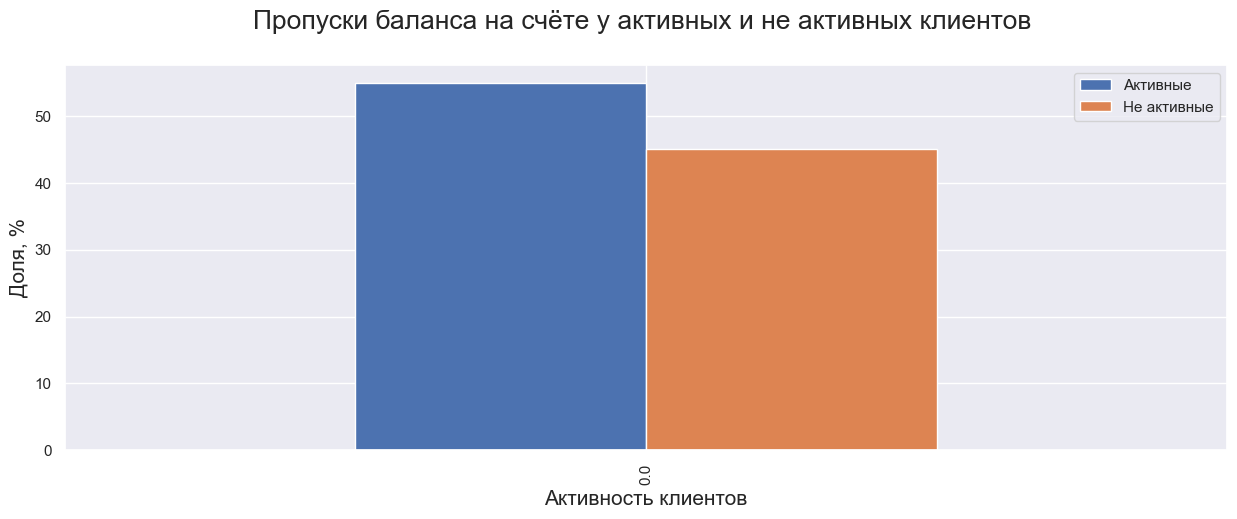

In [37]:
#Построим столбчатый график
sns.set()
last_activ.plot.bar(x='balance', figsize=(15,5))
plt.xlabel('Активность клиентов', size=15)
plt.ylabel('Доля, %', size=15)
plt.title('Пропуски баланса на счёте у активных и не активных клиентов ' + '\n', size=19)
plt.legend(["Активные", "Не активные"])

plt.show()

Больше всего пропусков баланса на счёте у активных клиентов.

Посмотрим пропуски баланса на счёте у тех, кто ушли и тех, кто остались.

In [38]:
churn = set_z.groupby('balance').agg({'churn' : 'count'}).rename(columns={'churn': 'vsego'}).reset_index()
klient = set_z.query('churn == "Клиент"')
n_klient = set_z.query('churn == "Ушёл в другой банк "')
klient = klient.groupby('balance').agg({'churn' : 'count'}).reset_index()
n_klient = n_klient.groupby('balance').agg({'churn' : 'count'}).reset_index()
churn['klient, %'] = round(klient['churn']/churn['vsego']*100,2)
churn['n_klient, %'] = round(n_klient['churn']/churn['vsego']*100,2)
churn = churn.drop(columns=['vsego']).sort_values(by='n_klient, %', ascending=False)

In [39]:
churn

,balance,"klient, %","n_klient, %"
0,0.0,99.43,0.57


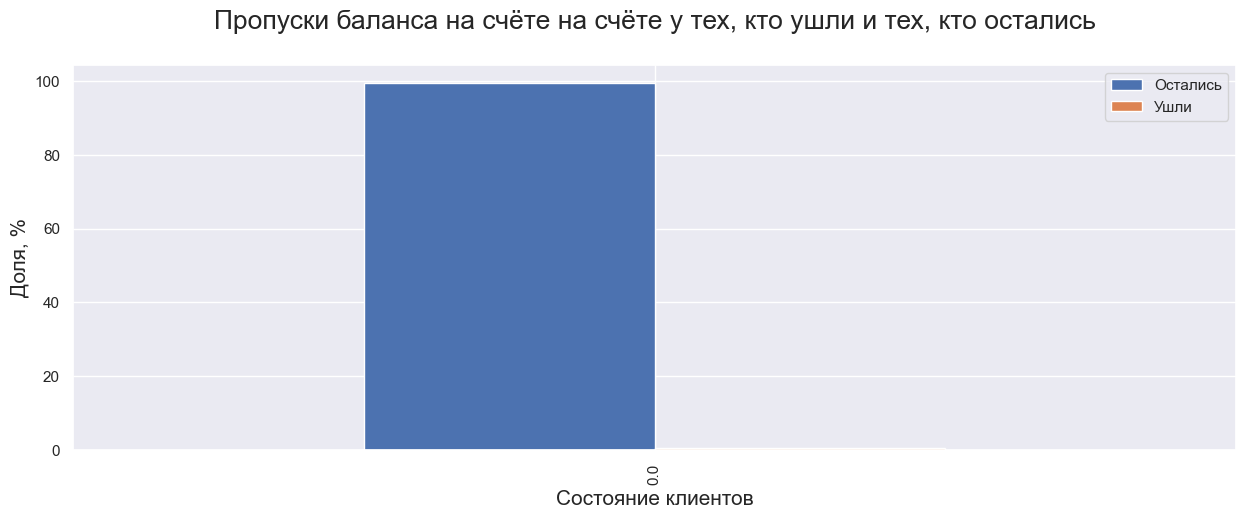

In [40]:
#Построим столбчатый график
sns.set()
churn.plot.bar(x='balance', figsize=(15,5))
plt.xlabel('Состояние клиентов', size=15)
plt.ylabel('Доля, %', size=15)
plt.title('Пропуски баланса на счёте на счёте у тех, кто ушли и тех, кто остались' + '\n', size=19)
plt.legend(["Остались", "Ушли"])

plt.show()

В основном пропуски в балансе на счёте у тех кто остались

При анализе пропусков в балансе можно сделать следующие промежуточные выводы:
1. Большинство пропусков приходится на Ярославль. Меньше всего на Ростов.
2. Большинство пропусков у женщин.
3. Больше всего пропусков баланса на счёте у активных клиентов, что значит, что они совершают какие то действия с балансом.
4. В основном пропуски в балансе на счёте у тех, кто остались. Если они остались и активны в балансе на счёте наверняка должны быть какие-нибудь операции.

Исходя из промежуточных выводов можно сделать вывод, что информация о балансе должна быть.
Пропуски в балансе могут быть связаны с техническими проблемами, такими как сбои в системе или проблемы при выгрузке данных.

In [41]:
# Посмотрим  пропуски в столбце возраст
df.isna().sum()

user_id          0 
score            0 
city             0 
gender           0 
age              26
equity           0 
balance          0 
products         0 
credit_card      0 
last_activity    0 
est_salary       0 
churn            0 
dtype: int64

Всего 26 строк. Посмотрим на них

In [42]:
df.loc[df["age"].isna()]# просмотрим пропущенные значения

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932,Ярославль,М,NaN,5,7601719.20,2,Есть карта,Активный,408121,Клиент
2165,187635,692,Рыбинск,Ж,NaN,0,0.00,1,Есть карта,Активный,160368,Клиент
2444,221156,913,Ярославль,М,NaN,0,0.00,1,Есть карта,Активный,135693,Клиент
3091,138660,836,Ростов,Ж,NaN,5,294315.53,2,Нет карты,Активный,63310,Ушёл в другой банк
4912,210674,834,Рыбинск,М,NaN,1,238330.52,2,Нет карты,Активный,93775,Клиент
5470,218868,827,Рыбинск,Ж,NaN,4,448959.07,2,Есть карта,Активный,67835,Клиент
5495,151662,884,Рыбинск,Ж,NaN,0,0.00,1,Есть карта,Активный,137500,Клиент
7236,210135,908,Рыбинск,Ж,NaN,4,1120340.31,3,Есть карта,Активный,85002,Клиент
7248,219343,920,Рыбинск,Ж,NaN,0,0.00,1,Есть карта,Не активный,159248,Клиент
7345,184913,829,Ярославль,Ж,NaN,3,188648.77,2,Нет карты,Активный,75206,Клиент


При анализе пропусков в возрасте можно сделать следующие промежуточные выводы:
1. В основном это действующие клиенты банка и они пользуются одним или двумя продуктами банка.
3. В основном это клиенты из г. Ярославля и г. Рыбинска.
4. В строках  встречаются пропуски и аномально большие цифры в строках по столбцу баланс на счете.

Можно предположить, что пропуски в возрасте клиентов могут быть связаны с некорректным заполнением данных оператором при сборе информации о клиентах и(или) с техническими проблемами, такими как сбои в системе .


Так как пропусков по столбцу возраст (Age) не много, удалим пропущенные значения.

In [43]:
df.dropna(subset=['age'], inplace=True)# удалим пропущеные значения

In [44]:
print('Количество явных дубликатов:', df.duplicated().sum())

Количество явных дубликатов: 0


In [45]:
# проверим не явные дубликаты
df.duplicated(subset=['user_id'], keep='first').sum()

50

Посмотрим есть дубликаты по значениям 'user_id' и 'city'

In [46]:
df.duplicated(subset=['user_id','city'], keep='first').sum()

0

По  значениям 'user_id' и 'city' дубликаты отстутствуют. Посмотрим на дубликаты по идентификатору пользователя.

In [47]:
p_row = df.loc[(df['user_id'] == 120258)]
display(p_row)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5863,120258,908,Рыбинск,Ж,38.0,4,2213581.63,2,Нет карты,Активный,160327,Ушёл в другой банк
5896,120258,905,Ярославль,М,30.0,0,0.00,1,Есть карта,Активный,146427,Клиент


Клиент зарегистрирован под одним идентификатором пользователя в двух городах. Удалим дублируемые идентификаторы пользователя.

In [48]:
df = df.drop_duplicates(['user_id'])# Удалим дубликаты

#### Проверка наличия выбросов

In [49]:
df.describe()# посмотрим на редкие и выбивающиеся значения

,user_id,score,age,equity,balance,products,est_salary
count,9924.000000,9924.000000,9924.000000,9924.000000,9.924000e+03,9924.000000,9.924000e+03
mean,171737.158706,848.731358,42.728839,2.634522,6.395982e+05,1.871624,1.478797e+05
std,33697.419981,65.396890,12.176452,1.979371,1.777858e+06,0.793151,1.393583e+05
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,2.546000e+03
25%,142725.000000,802.000000,33.000000,0.000000,6.367806e+04,1.000000,7.525200e+04
50%,172643.000000,853.000000,40.000000,3.000000,3.767156e+05,2.000000,1.197150e+05
75%,201159.250000,900.000000,51.000000,4.000000,8.051574e+05,2.000000,1.746662e+05
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.395064e+06


Рассмотрим распределение клиентов по возрастам

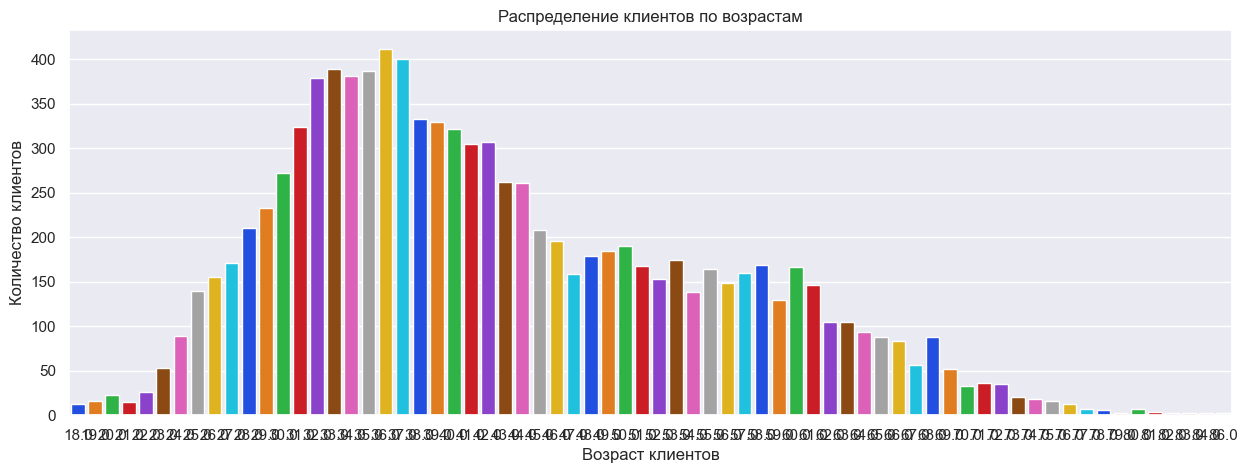

In [50]:
# сгруппируем данные
vozrast_klientov = df.groupby('age').agg({'user_id':'count'}).reset_index()

vozrast_klientov = vozrast_klientov.sort_values('age', ascending=False).reset_index(drop=True)

plt.figure(figsize=(15, 5))
sns.barplot(data=vozrast_klientov, x='age', y='user_id', palette='bright')
plt.title('Распределение клиентов по возрастам')
plt.xlabel('Возраст клиентов')
plt.ylabel('Количество клиентов')
plt.show()

Согласно графику, основной возраст клиентов от 28 до 46 лет. Заметно отличается количество клиентов в возрасте 68 лет от соседних возрастных категорий. 

In [51]:
print('Клиенты с возрастом - 67 лет:', df.query('age==67')['age'].count()) # Клиенты возрастом 67 лет

Клиенты с возрастом - 67 лет: 57


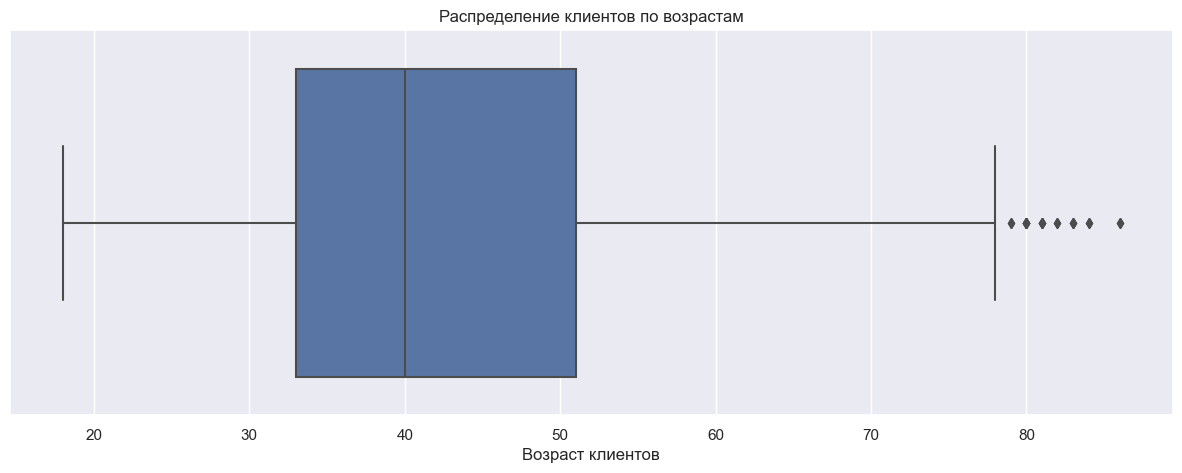

In [52]:
plt.rcParams ['figure.figsize'] = [15, 5]
# Построение boxplot
ax = sns.boxplot(x='age', data=df)
plt.title('Распределение клиентов по возрастам')
plt.xlabel('Возраст клиентов')
plt.show()

Диаграмма размаха показывает, что большинство клиентов находятся в диапазоне от 33 до 53 лет, однако есть  клиенты старше 78, которые могут быть аномалиями.

In [53]:
print('Клиенты старше 78 лет:', df.query('age>78')['age'].count()) # Клиенты старше 78 лет

Клиенты старше 78 лет: 22


Таких клиентов оказалось всего 22. Оставим без изменения.

Рассмотрим распределение клиентов по размерам зарплаты.

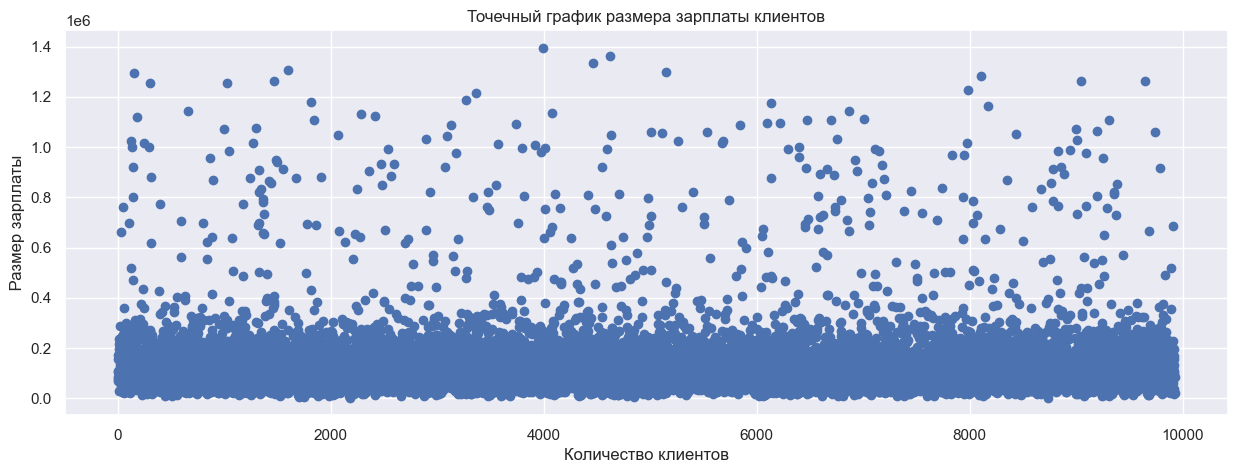

In [54]:
plt.rcParams ['figure.figsize'] = [15, 5]
x_values = pd.Series(range(0, len(df['est_salary'])))
plt.scatter(x_values, df['est_salary']) 
plt.title('Точечный график размера зарплаты клиентов')
plt.xlabel('Количество клиентов')
plt.ylabel(' Размер зарплаты ');

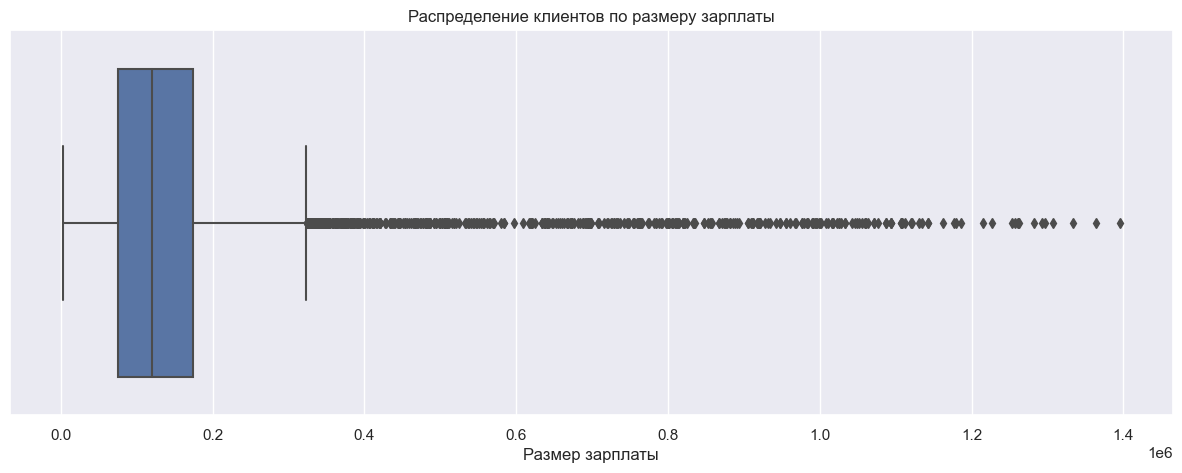

In [55]:
# Построение boxplot
ax = sns.boxplot(x='est_salary', data=df)
plt.title('Распределение клиентов по размеру зарплаты')
plt.xlabel('Размер зарплаты')

plt.show()

In [56]:
print('Клиенты с ЗП более 400 000 руб.:', df.query('est_salary>400000')['est_salary'].count()) # Клиенты с ЗП более 400 000 руб

Клиенты с ЗП более 400 000 руб.: 334


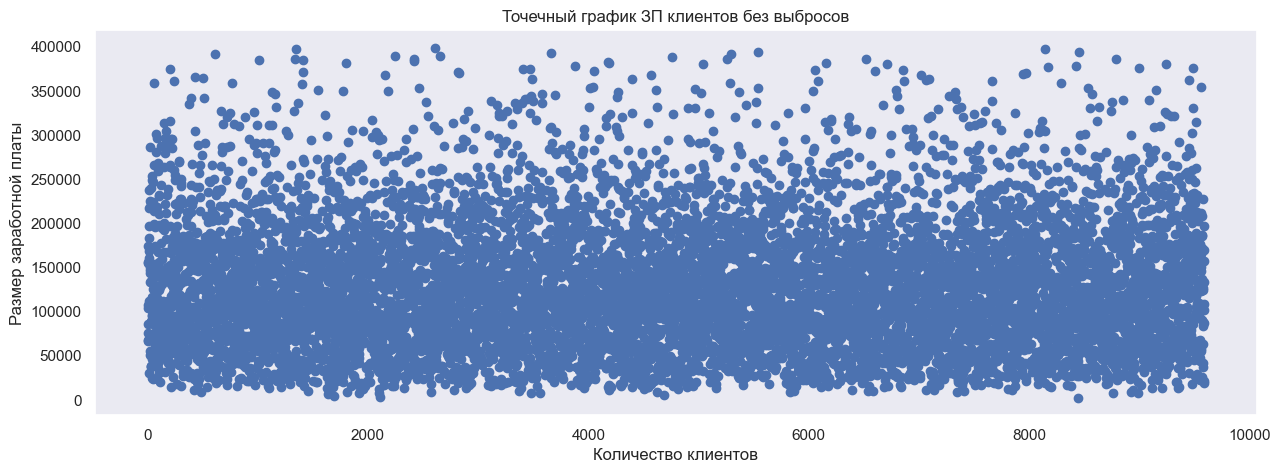

In [57]:
zp_bez_vbrosov = df[df['est_salary']<=400000]['est_salary']
xn_values = pd.Series(range(0,len(zp_bez_vbrosov)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график ЗП клиентов без выбросов')
plt.xlabel('Количество клиентов')
plt.ylabel('Размер заработной платы')
plt.scatter(xn_values, zp_bez_vbrosov);

Удалим строки с клиентами с ЗП более 400 000 руб.

In [58]:
df.drop(df.query('est_salary > 400000').index,inplace=True) # удаляем строки с клиентами с ЗП более 400 000 руб.

C:\Users\User\AppData\Local\Temp\ipykernel_8252\3956003832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.query('est_salary > 400000').index,inplace=True) # удаляем строки с клиентами с ЗП более 400 000 руб.


Так же обратим внимание на минимальный размер зарплаты. В РФ минимальный размер оплаты труда - 13 890 р. В датафрейме минимальный размер оплаты труда - 2546 руб. Посмотрим на кол-во клиентов с размером оплаты труда  менее 13 890 р.

In [59]:
print('Клиенты с ЗП менее 13890 руб.:', df.query('est_salary<13890')['est_salary'].count()) # Клиенты с ЗП менее 13890 руб.

Клиенты с ЗП менее 13890 руб.: 45


Удалим строки с клиентами с ЗП - 13890 руб.

In [60]:
df.drop(df.query('est_salary < 13890').index,inplace=True) # удаляем строки с клиентами с ЗП более 400 000 руб.

C:\Users\User\AppData\Local\Temp\ipykernel_8252\3253893152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.query('est_salary < 13890').index,inplace=True) # удаляем строки с клиентами с ЗП более 400 000 руб.


In [61]:
df['est_salary'].describe()# проверяем полученный результат

count    9545.000000  
mean     127434.862860
std      70200.462714 
min      13937.000000 
25%      74529.000000 
50%      117024.000000
75%      168102.000000
max      399043.000000
Name: est_salary, dtype: float64

#### Добавление столбцов для анализа

Добавим столбец с уровнем ЗП

In [62]:
# напишем функцию
def categorize(bill):
    try:
        if 13937 <= bill <= 74529:
            return 'ЗП ниже среднего'
        elif 74529.1 <= bill <= 127423.5:
            return 'ЗП средняя'
        elif 127423.6 <= bill <= 168097.5:
            return 'ЗП выше среднего'
        elif bill >= 168097.6:
            return 'ЗП высокая'
    except:
        pass


In [63]:
# Создадим столбец uroven_zp и пременим метод apply() 
df['uroven_zp']=df['est_salary'].apply(categorize)





C:\Users\User\AppData\Local\Temp\ipykernel_8252\880138226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['uroven_zp']=df['est_salary'].apply(categorize)


In [64]:
df['score'].describe()# Посмотрим баллы кредитного скоринга

count    9545.000000
mean     847.749188 
std      63.977798  
min      642.000000 
25%      802.000000 
50%      852.000000 
75%      898.000000 
max      999.000000 
Name: score, dtype: float64

Рассмотрим распределение клиентов по баллам кредитного скоринга.

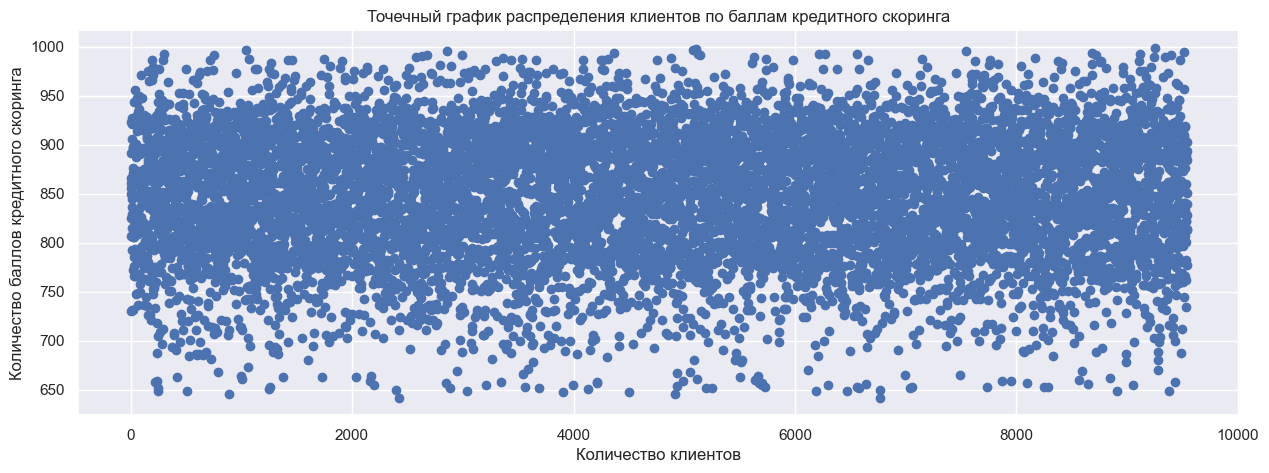

In [65]:
plt.rcParams ['figure.figsize'] = [15, 5]
x_values = pd.Series(range(0, len(df['score'])))
plt.scatter(x_values, df['score']) 
plt.title('Точечный график распределения клиентов по баллам кредитного скоринга')
plt.xlabel('Количество клиентов')
plt.ylabel('Количество баллов кредитного скоринга');

В основном клиенты имеют от 750 до 950 баллов кредитного скоринга.

Добавим столбец с уровнем кредитного скоринга

In [66]:
# напишем функцию
def categorize(bill):
    try:
        if 642 <= bill <= 801.9:
            return 'Низкий уровень'
        elif 802 <= bill <= 847.7:
            return 'Средний уровень'
        elif 847.8 <= bill <= 898 :
            return 'Выше среднего уровня'
        elif bill >= 898.1:
            return 'Высокий уровень'
    except:
        pass

In [67]:
# Создадим столбец uroven_kredit_skoringa и пременим метод apply() 
df['uroven_kredit_skoringa']=df['score'].apply(categorize)


C:\Users\User\AppData\Local\Temp\ipykernel_8252\4264851159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['uroven_kredit_skoringa']=df['score'].apply(categorize)


Добавим столбец состояние баланса

In [68]:
df['balance'].describe()# Посмотрим данные о балансе

count    9.545000e+03
mean     5.945617e+05
std      1.624683e+06
min      0.000000e+00
25%      9.572716e+04
50%      3.836325e+05
75%      8.012031e+05
max      1.191136e+08
Name: balance, dtype: float64

In [69]:
# напишем функцию
def categorize(bill):
    try:
        if 0 <= bill <= 1:
            return 'Нет данных о балансе'
        elif 2 <= bill <=  95747.01:
            return 'Минимальный баланс'
        elif  95747.02 <= bill <= 594459.6:
            return 'Средний баланс'
        elif bill >= 594459.7:
            return 'Высокий баланс'
    except:
        pass

In [70]:
# Создадим столбец sotojnie_balansa и пременим метод apply() 
df['sotojnie_balansa']=df['balance'].apply(categorize)

C:\Users\User\AppData\Local\Temp\ipykernel_8252\1096648724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sotojnie_balansa']=df['balance'].apply(categorize)


#### **Вывод о подготовке данных** 

В ходе подготовки данных к анализу были изучены данные столбцов, заполнены "0" пропуски по столбцу "баланс на счёте", удалены выбросы по заработной плате и возрасту.  Дубликаты были удалены. Были добавлены столбцы для анализа.

<div class='alert alert-success'>👍 
Предобработка в целом выполнена корректно, присутствуют все самые важные этапы. Однако не хватает более детального исследования пропусков и дубликатов


### Исследовательский анализ данных

#### Построение общих графиков


Создадим график распределения клиентов по различным признакам, таким как город, пол, кредитная карта, активность, верность банку и.т.д. Для этого создадим объект DataFrame, который группируется по каждому признаку и агрегируется по значению user_id. Затем создадим объект matplotlib.pyplot, который используется для визуализации полученного графика в виде столбчатой диаграммы. На графике отображаются значения user_id для каждого признака и название признака, которое задается в параметре plt.title. Выведем график с помощью команды plt.show(). 

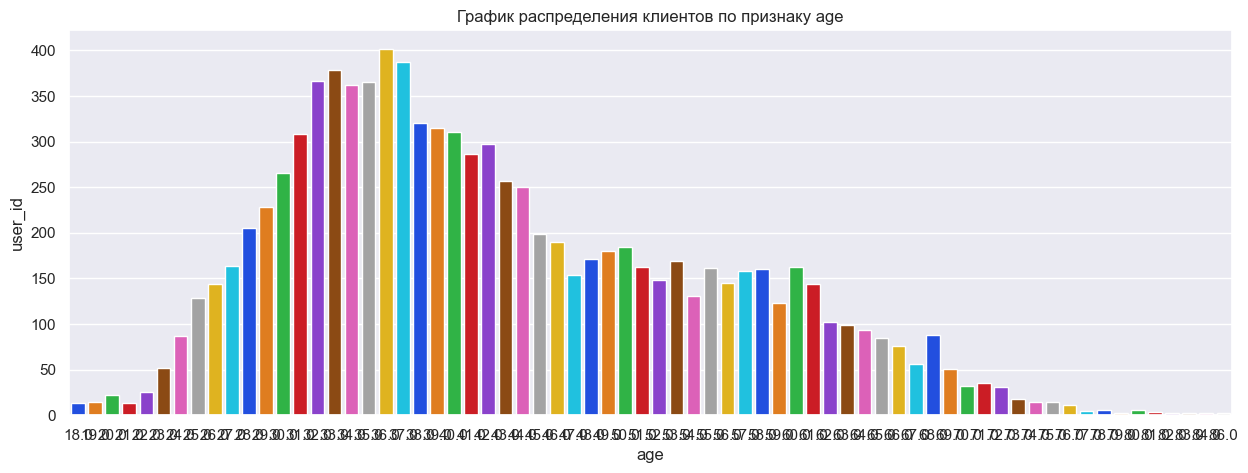

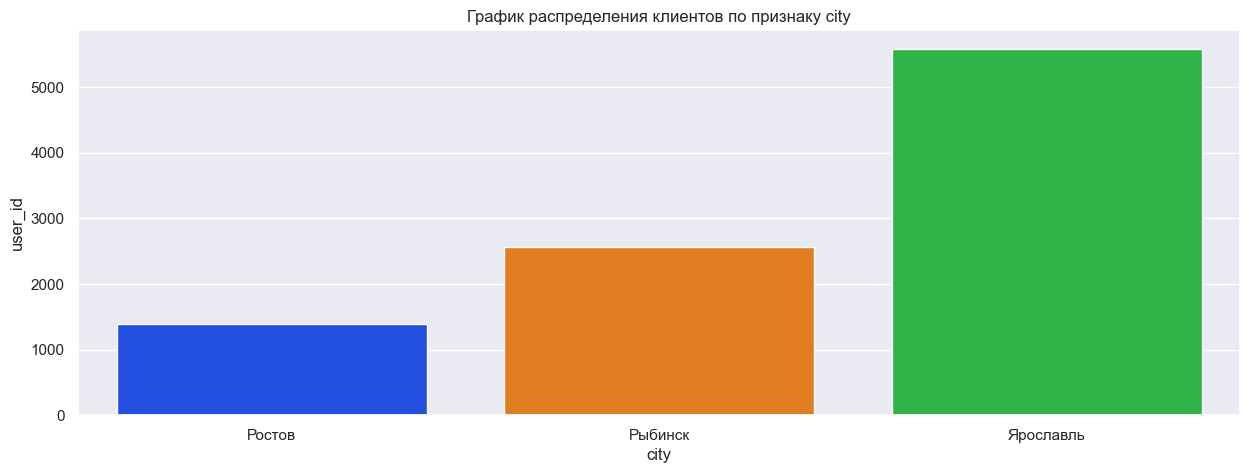

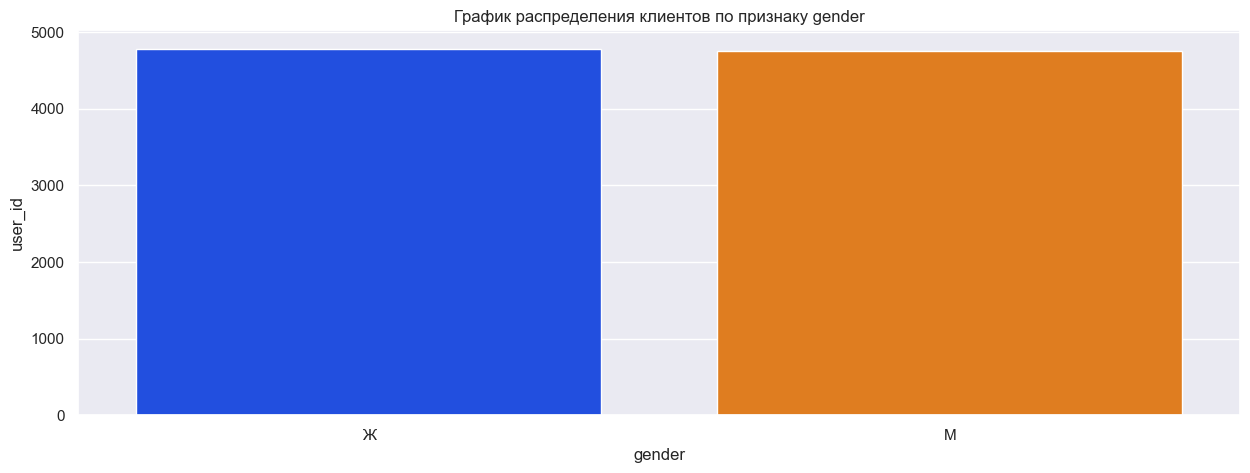

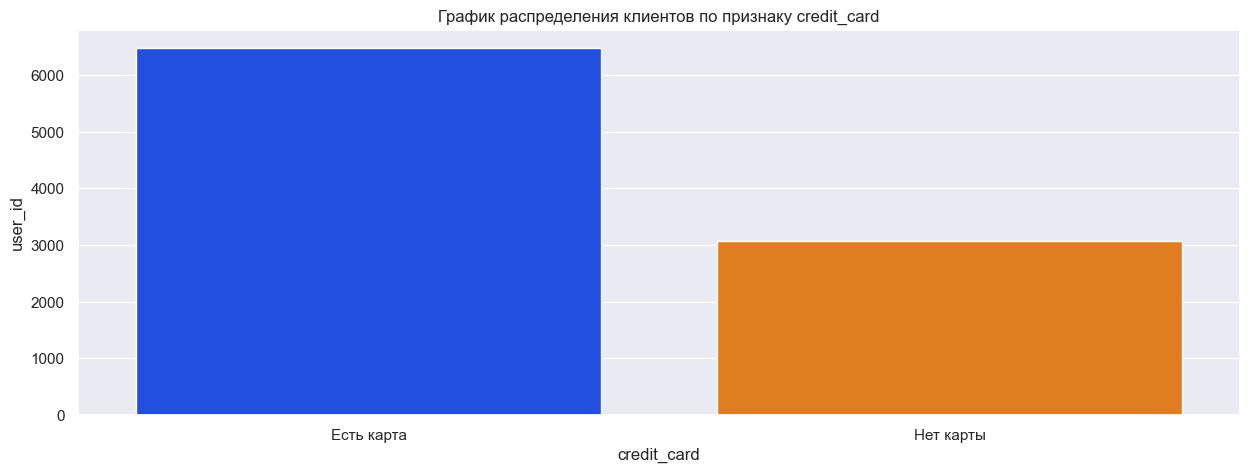

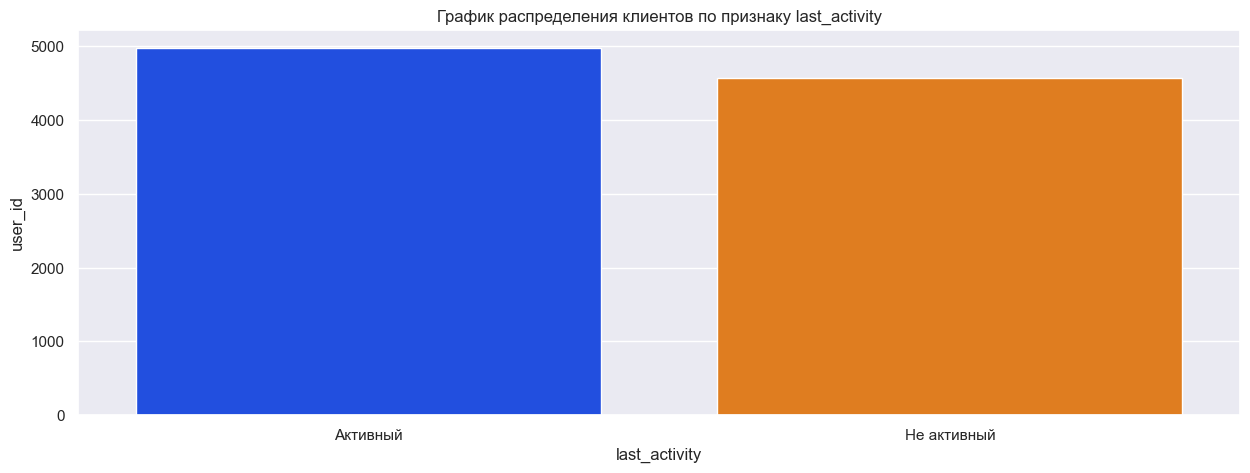

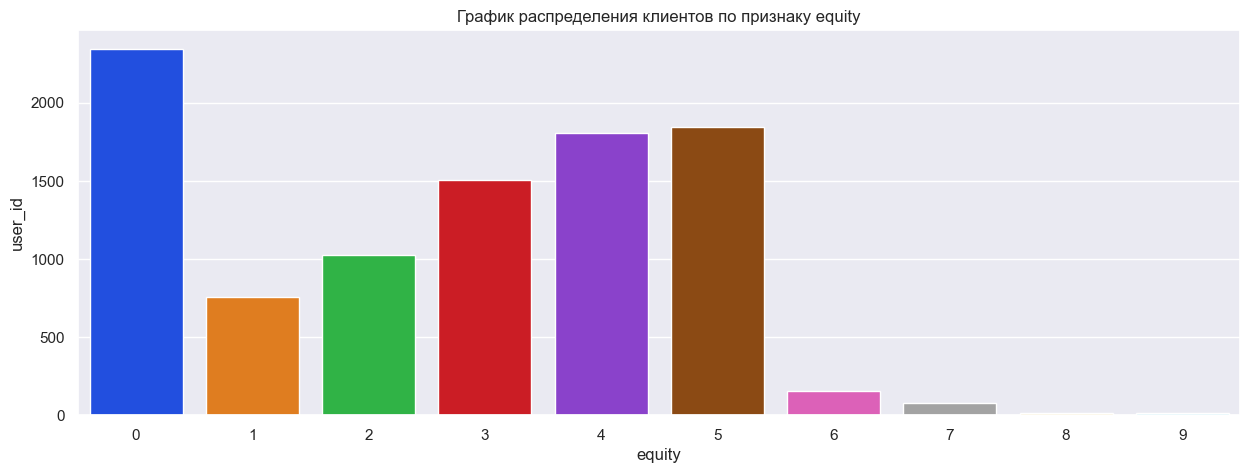

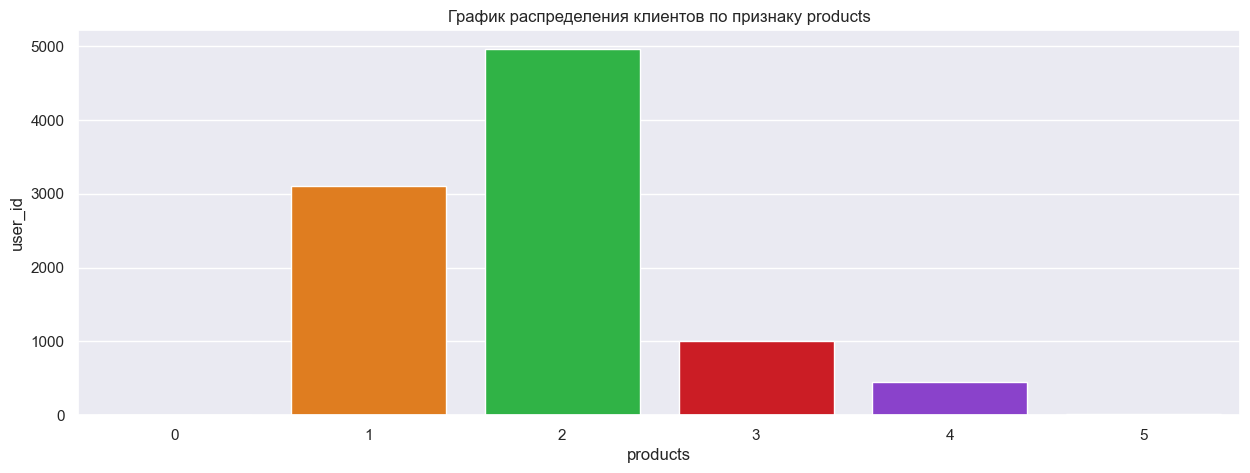

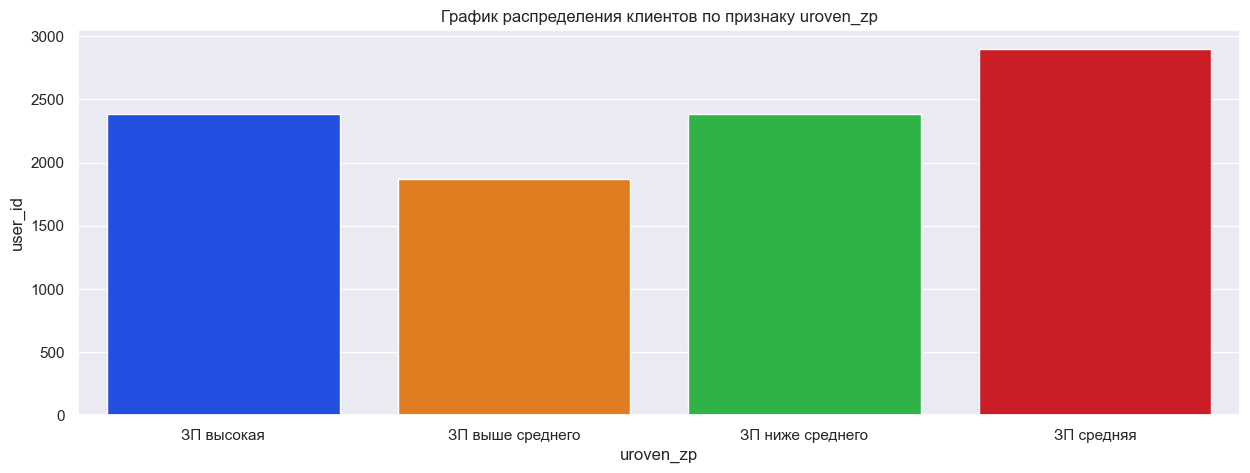

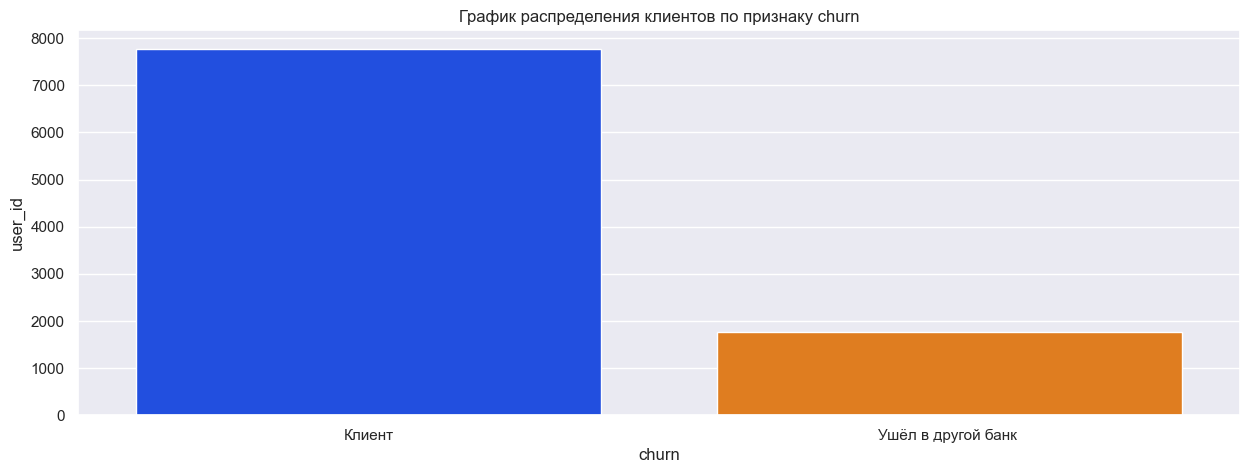

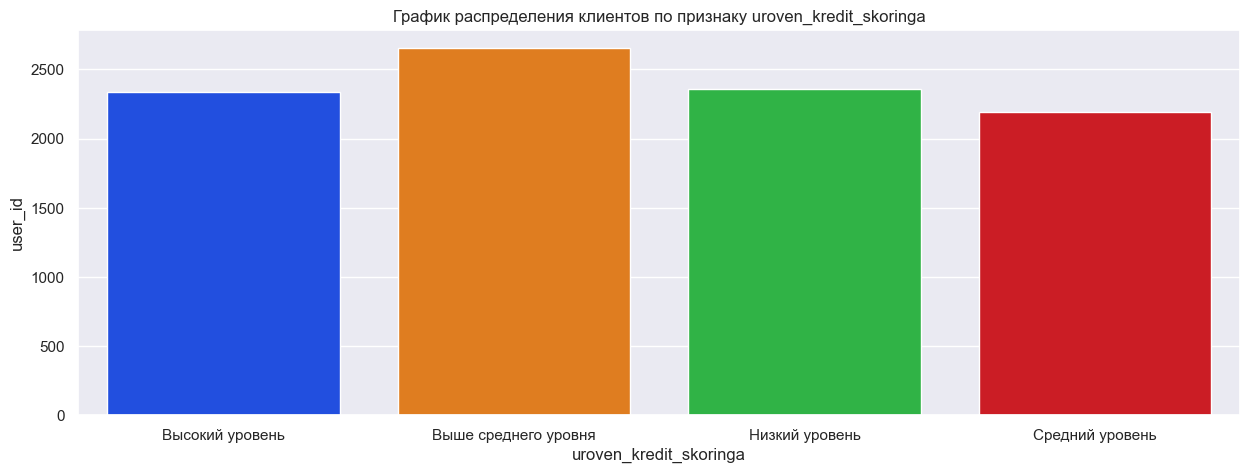

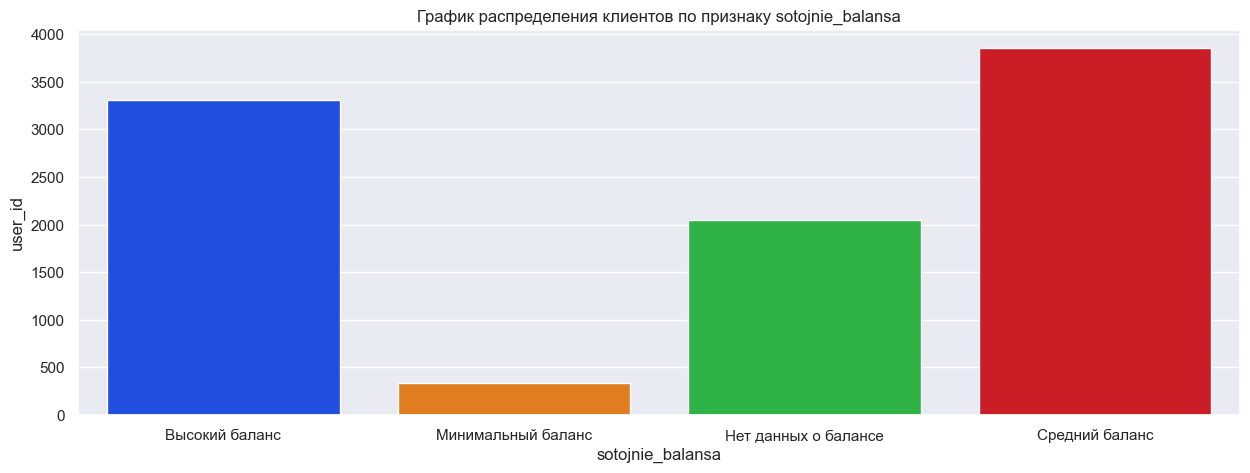

In [71]:
for column in ['age','city','gender','credit_card','last_activity','equity','products','uroven_zp','churn','uroven_kredit_skoringa','sotojnie_balansa']:
     # создаем объект DataFrame с группировкой по столбцу column и агрегированием по user_id
    df1 = df.groupby(column).agg({'user_id': 'count'})
    # создаём объект matplotlib.pyplot для визуализации графика
    plt.figure(figsize=(15, 5))
    sns.barplot(data=df1, x= df1.index, y='user_id', palette='bright')
    plt.title(f'График распределения клиентов по признаку {column}')
    
    plt.show() # Выведем график 

Возраст большинства клиентов от 30 до 44 лет. 
Большинство клиентов сосредоточены в г. Ярославле. 
Женщин среди клиентов больше, чем мужчин. 
У большинства клиентов есть кредитная карта.
Большинство клиентов активны и остаются клиентами банка.
У большинства клиентов нет недвижимости. 
Большинство пользуются двумя продуктами банка. 
Большинство имеет среднюю заработную плату и остаются клиентами банка. 
У большинства уровень баллов кредитного скоринга выше среднего. 
Большинство клиентов имеют средний баланс на счёте.


Проанализируем отток клиентов.

In [72]:
ot = df.query('churn == "Ушёл в другой банк "') # рассмотрим как распределены по признакам клиенты, которые ушли. 

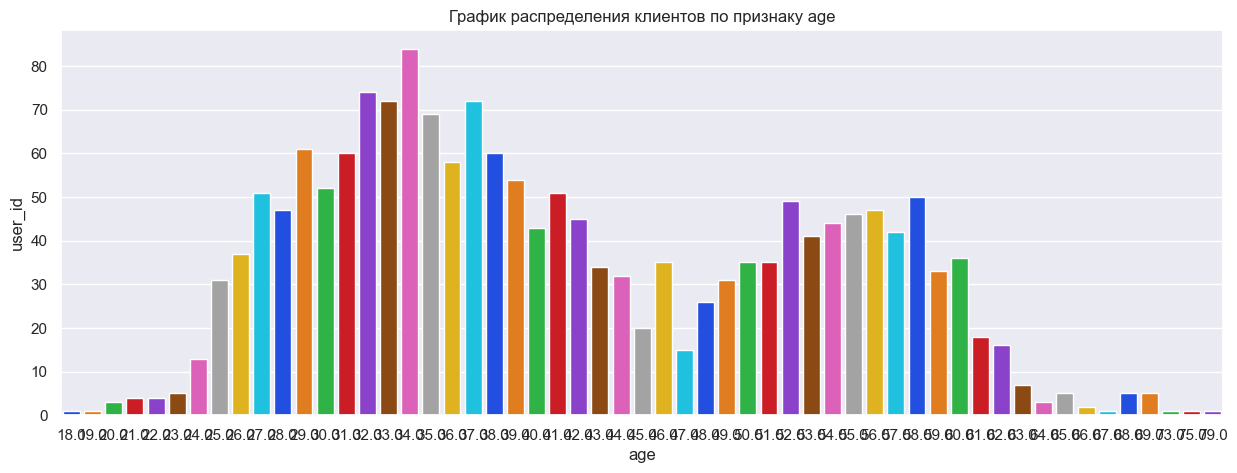

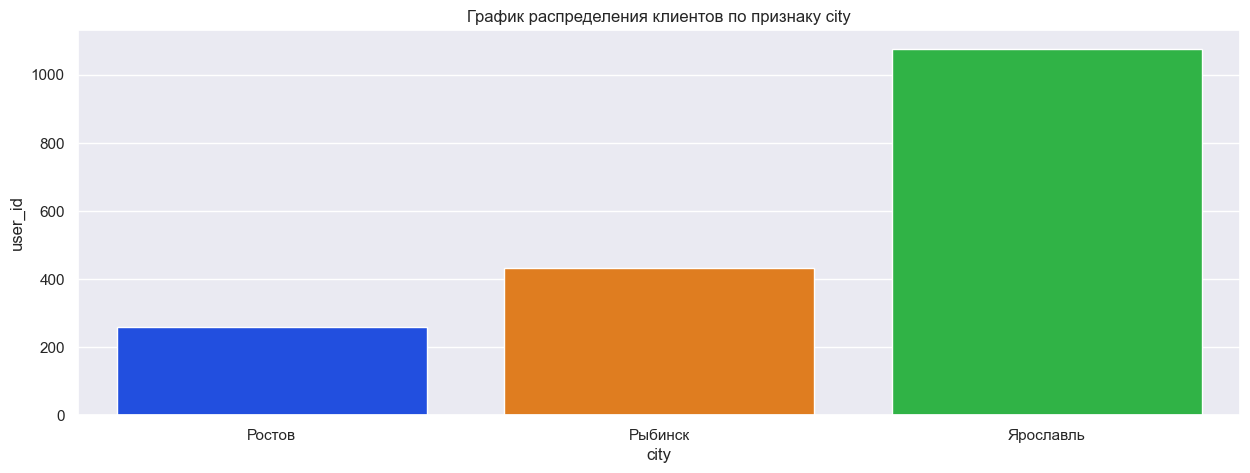

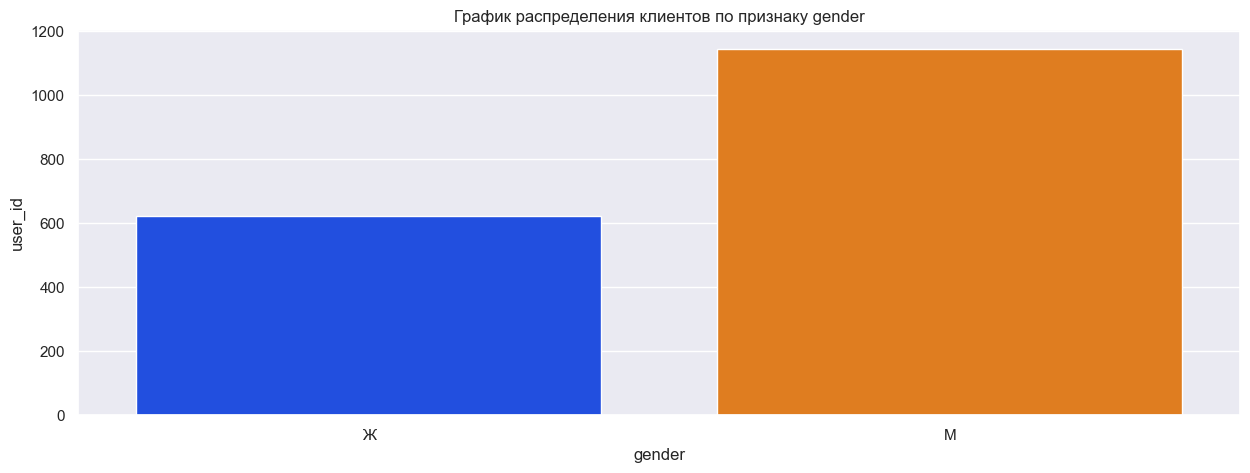

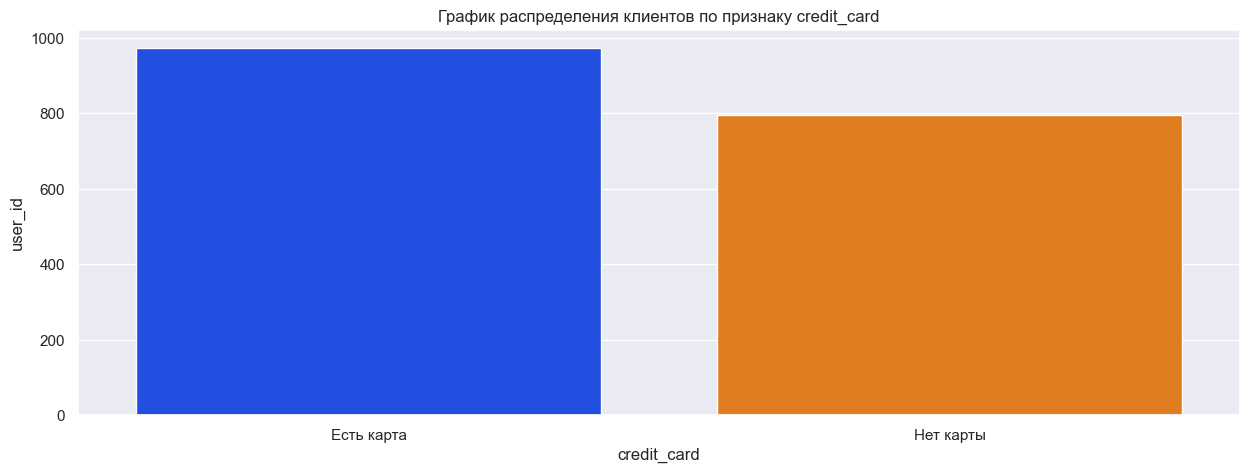

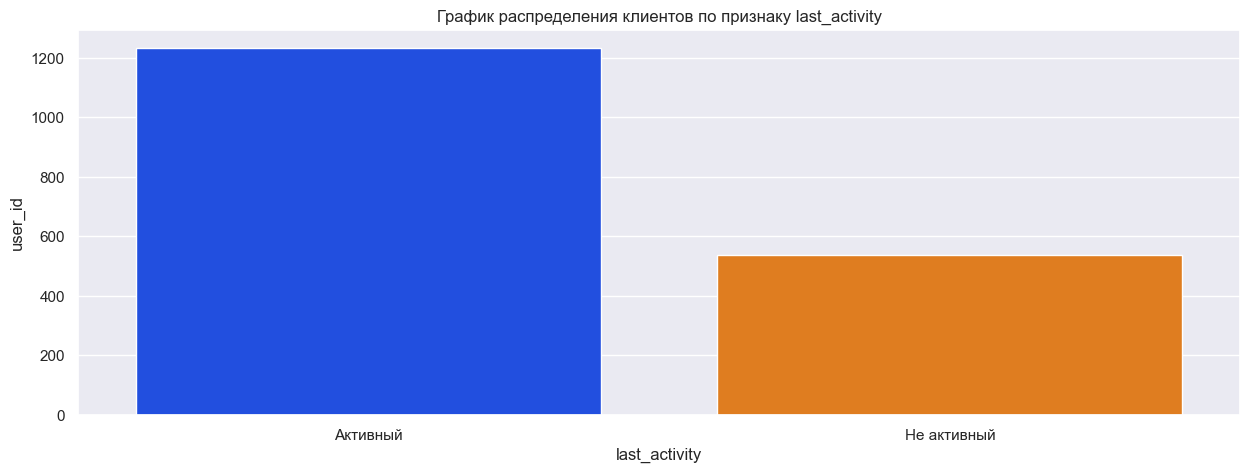

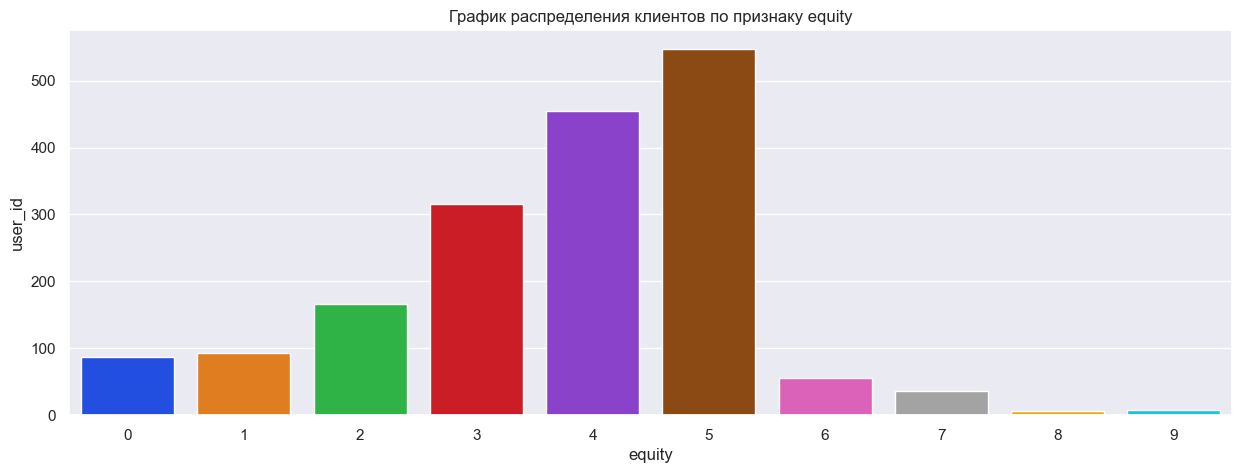

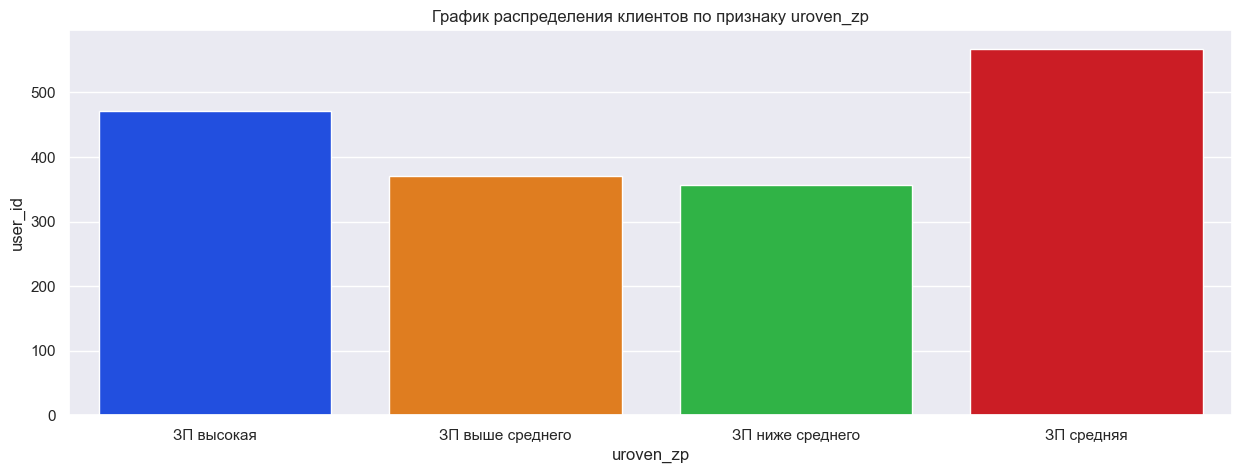

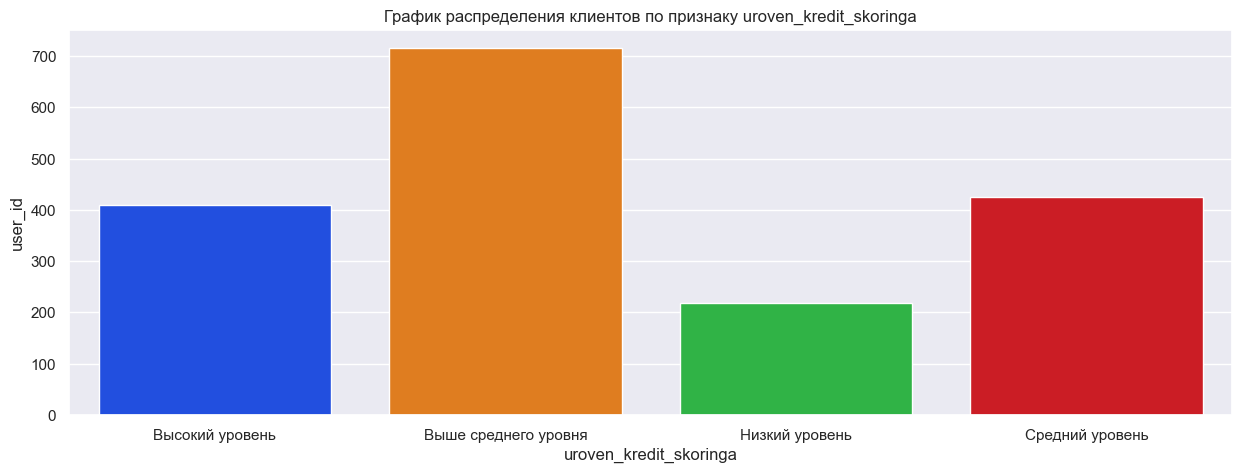

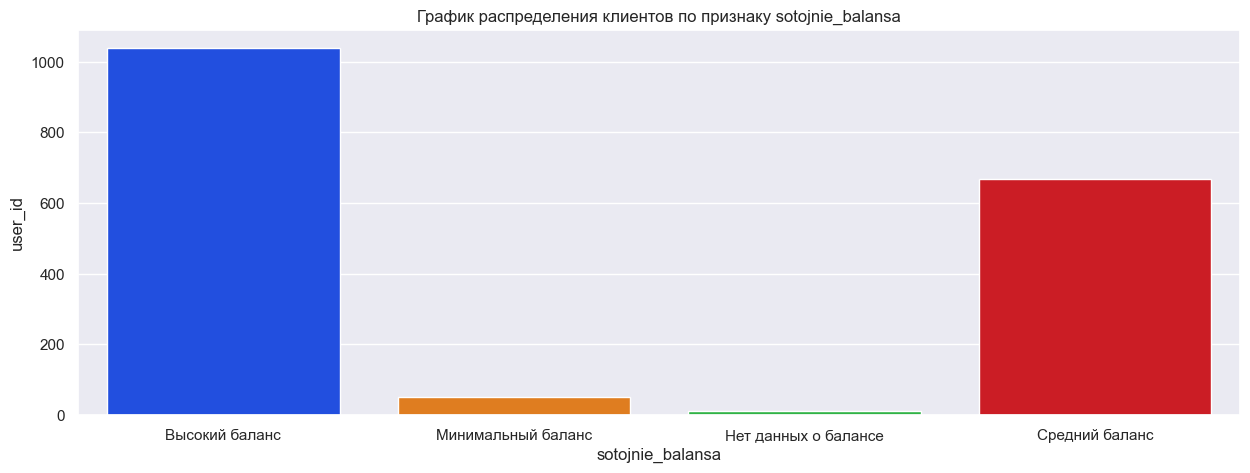

In [73]:
for column in ['age','city','gender','credit_card','last_activity','equity','uroven_zp','uroven_kredit_skoringa','sotojnie_balansa']:
     # создаем объект DataFrame с группировкой по столбцу column и агрегированием по user_id
    df5 = ot.groupby(column).agg({'user_id': 'count'})
    # создаём объект matplotlib.pyplot для визуализации графика
    plt.figure(figsize=(15, 5))
    sns.barplot(data=df5, x= df5.index, y='user_id', palette='bright')
    plt.title(f'График распределения клиентов по признаку {column}')
    plt.show() # Выведем график 

При анализе возраста клиентов можно наблюдать две более многочисленные группы  с 26 по 42 лет и с 50 до 60 лет.
Большинство клиентов представлено из г. Ярославля. 
Большинство из них мужчины. 
У большинства есть кредитная карта. 
Большинство из них активны и имеют в собственности 5 объектов.
У большинства средняя зарплата и имеют уровень баллов кредитного скоринга выше среднего уровня.
Большинство имеют высокий баланс на счете.

#### Построение матрицы корреляций на числовых признаках 


С помощью функции `heatmap` из библиотеки Seaborn создадим матрицу корреляций между столбцами данных df. Аргументами функции являются матрица корреляций, ось `x` (для меток столбцов) и ось `y` (для меток строк).

C:\Users\User\AppData\Local\Temp\ipykernel_8252\3382840097.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True, cmap='Purples', linewidths=0.5, fmt='.2', alpha=0.5)


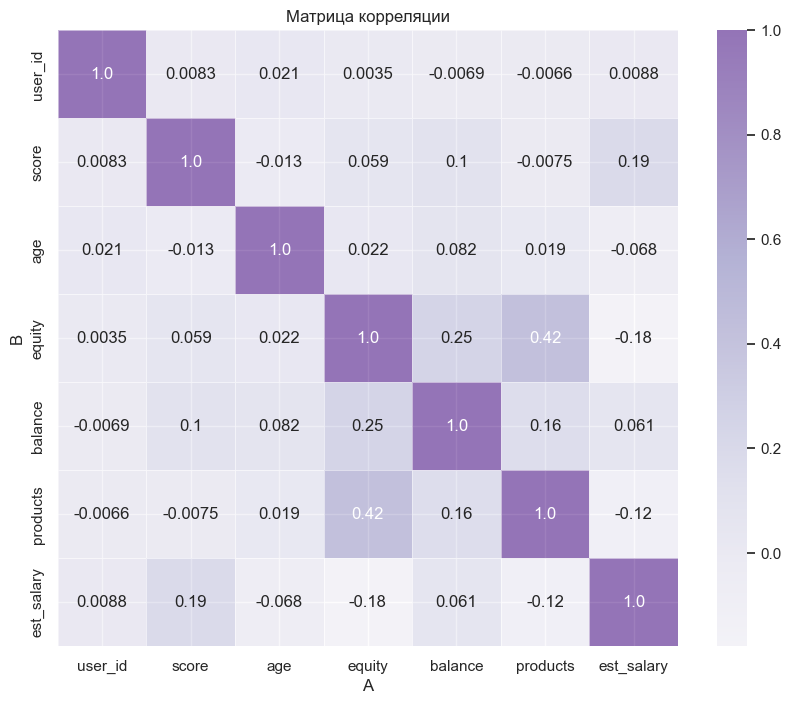

In [74]:
f, ax = plt.subplots(figsize=(10,8))
sns.set(rc={'figure.figsize': (10, 8)})#  установим размер фигуры (10x8)
sns.heatmap(df.corr(), ax=ax, annot=True, cmap='Purples', linewidths=0.5, fmt='.2', alpha=0.5)
ax.set_title('Матрица корреляции')# установим заголовок графика с помощью метода `set_title`.
ax.set(xlabel='A', ylabel='B')# установим метки осей
plt.show()

In [75]:

df['city_hot'] = df['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})
df = pd.get_dummies(df)



C:\Users\User\AppData\Local\Temp\ipykernel_8252\535020946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_hot'] = df['city'].map({'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2})


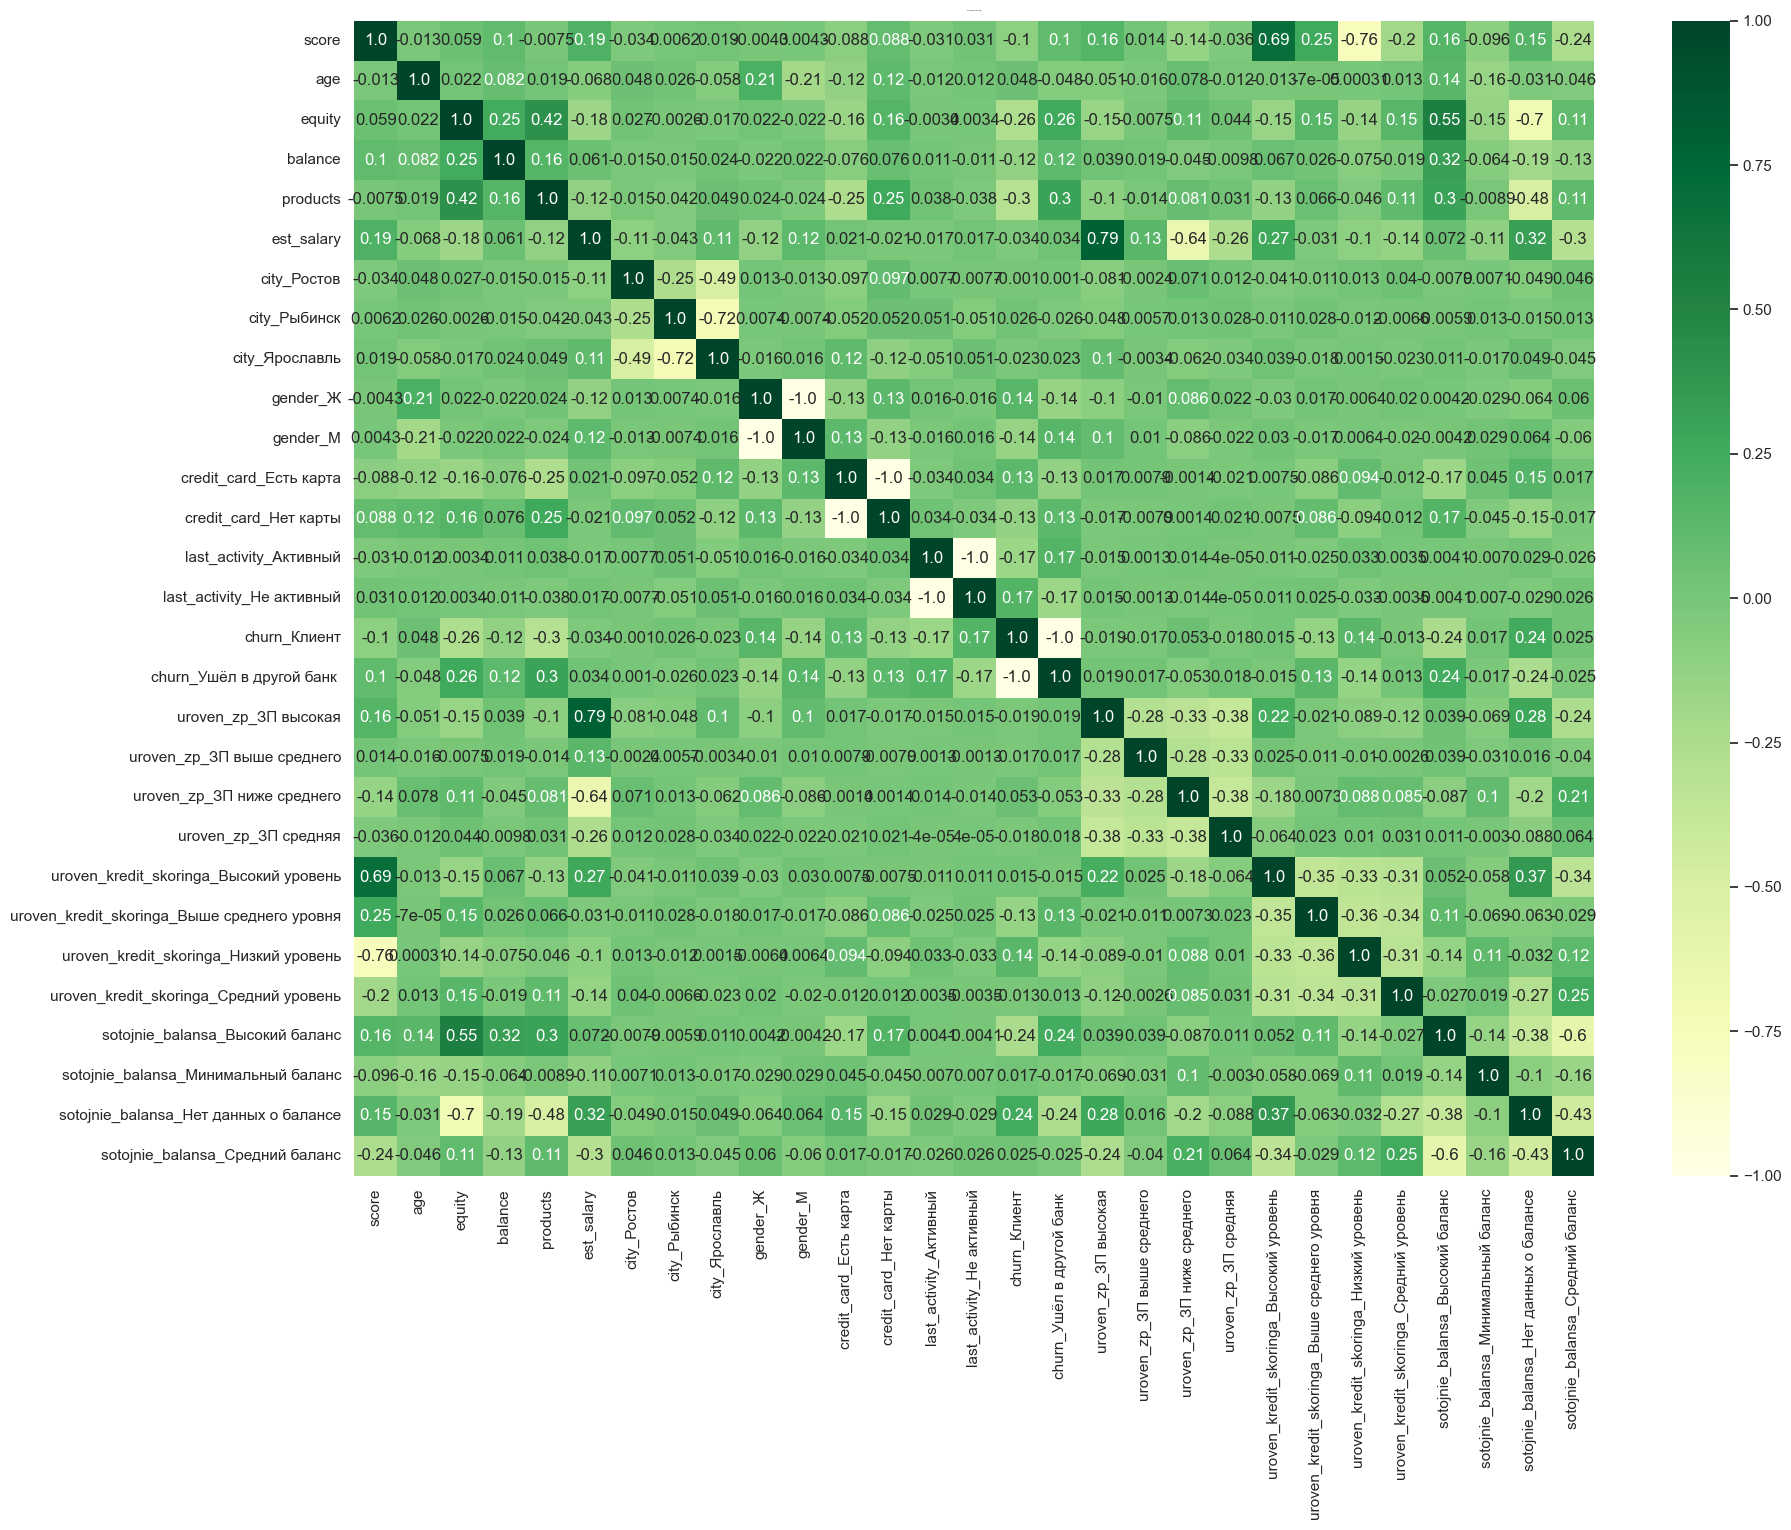

In [76]:
df_cor = df.drop(['user_id', 'city_hot'], axis=1)
plt.figure(figsize=(20, 15)) 
heatmap = sns.heatmap(df_cor.corr(),fmt='.2', annot=True, cmap='YlGn')

heatmap.set_title('Корреляция признаков', fontdict={'fontsize':1}, pad=7);

Можно выделить высокую зависимость между количеством продуктов и количеством объектов в собственности. Вероятно, одним из продуктов является ипотека, которым пользуются клиенты. Также высокая зависимость между балансом на счете и количеством объектов в собственности. Для выплат ипотеки систематически нужно иметь высокую сумму на счёте. Также можно выделить зависимость баллов кредитного скоринга от зарплаты клиентов. По остальным признакам зависимости минимальны.

#### **Вывод о проведенном исследовательском анализе данных** 

<p>На основе проведенного анализа данных можно сделать следующие выводы:</p>
<p>1. Возраст большинства клиентов от 30 до 44 лет. <br />2. Большинство клиентов сосредоточены в г. Ярославле. <br />3. Женщин среди клиентов больше, чем мужчин. <br />4. У большинства клиентов есть кредитная карта.<br />5. Большинство клиентов активны и остаются клиентами банка.<br />6. У большинства клиентов нет недвижимости. <br />7. Большинство пользуются двумя продуктами банка. <br />8. Большинство имеет среднюю заработную плату и остаются клиентами банка. <br />9. У большинства уровень баллов кредитного скоринга выше среднего. <br />10. Большинство клиентов имеют средний баланс на счёте.<br />11. Можно выделить высокую зависимость между количеством продуктов и объектов в собственности. Вероятно, одним из продуктов является ипотека, которым пользуются клиенты.<br />12. Есть высокая зависимость между балансом на счете и количеством объектов в собственности. Для выплат ипотеки систематически нужно иметь высокую сумму на счёте.<br />13. Можно выделить высокую зависимость баллов кредитного скоринга от зарплаты клиентов.</p>
<p>Для клиентов, которые ушли в другой банк, можно выделить следующие характеристики:<br />1. При анализе возраста клиентов можно наблюдать две более многочисленные группы с 26 по 42 лет и с 50 до 60 лет.<br />2. Большинство клиентов представлено из г. Ярославля. <br />3. Большинство из них мужчины. <br />4. У большинства есть кредитная карта. <br />5. Большинство из них активны и имеют в собственности 5 объектов.<br />6. У большинства средняя зарплата и имеют уровень баллов кредитного скоринга выше среднего уровня.<br />7. Большинство имеют высокий баланс на счете.</p>



### Сегментация пользователей на основе данных о количестве потребляемых продуктов

#### Построение графиков сегментации

Рассмотрим, как распределены клиенты по признакам.

In [77]:
# функция по отрисовке гистограммы распределения и диаграммы размаха для числовых признаков;
# на входе функции передем параметры: датафрейм, название столбца, по которому строим график, название графика;

def numeric_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.histplot(df[df['products']==1][col], label = '1 продукт', color = '#EFC87B', ax = plt.subplot(1, 2, 1))
    sns.histplot(df[df['products']==2][col], label = '2 продукта', color = '#184562', ax = plt.subplot(1, 2, 1), alpha=.5)
    sns.histplot(df[df['products']==3][col], label = '3 продукта', color = '#189562', ax = plt.subplot(1, 2, 1), alpha=.5)
    sns.histplot(df[df['products']==4][col], label = '4 продукта', color = '#184532', ax = plt.subplot(1, 2, 1), alpha=.5)
    sns.histplot(df[df['products']==5][col], label = '5 продуктов', color = '#184532', ax = plt.subplot(1, 2, 1), alpha=.5)
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    
    sns.boxplot(y = col, x = 'products', data = df, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(5), ('1 прод.', '2 прод.','3 прод.', '4 прод.', '5 прод.'))
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [78]:
# функция по отрисовке столбчатых диаграмм и диаграммы размаха для категориальных признаков;
# на входе функции передем параметры: датафрейм, название столбца, по которому строим график, название графика;

def categorical_plots(df, col, title):
    fig, ax = plt.subplots(figsize = (15, 5))

    sns.countplot(x = col, hue = 'products', data = df, ax = plt.subplot(1, 2, 1),  palette='Pastel2')
    plt.ylabel('количество пользователей')
    plt.xlabel('')
    plt.legend() 
    
    gr = df.groupby([col, 'products']).agg(count=('user_id', 'count')).reset_index()
    sns.boxplot(x = col, y = 'count', data = gr, ax = plt.subplot(1, 2, 2), palette='Pastel2_r') 
    
    plt.xlabel('')
    plt.ylabel('')
    
    
    fig.suptitle(title + ' (' + col + ')')
    plt.show()

In [79]:
# соберём для удобства в DataFrame название колонок и названия графиков:

numeric = pd.DataFrame({'col' : ['score', 'age', 'equity', 'balance', 'est_salary'], 
                        'title' : ['Баллы кредитного скорринга', 'Возраст', 
                                   'Количество объектов недвижимости в собственности', 
                                   'Баланс','Заработная плата клиента']
                       })

categorical = pd.DataFrame({'col' : ['gender','city', 'credit_card', 'last_activity', 'churn'],
                            'title' : ['Пол','Город', 'Наличие кредитной карты', 'Активность', 'Отток']
                            })

C:\Users\User\AppData\Local\Temp\ipykernel_8252\483383645.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.histplot(df[df['products']==1][col], label = '1 продукт', color = '#EFC87B', ax = plt.subplot(1, 2, 1))


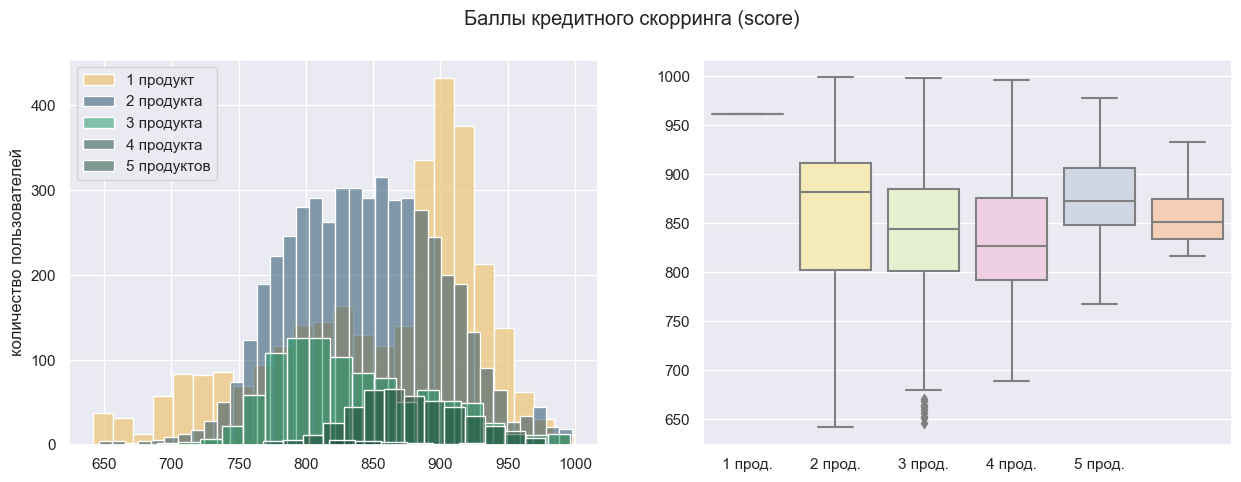

C:\Users\User\AppData\Local\Temp\ipykernel_8252\483383645.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.histplot(df[df['products']==1][col], label = '1 продукт', color = '#EFC87B', ax = plt.subplot(1, 2, 1))


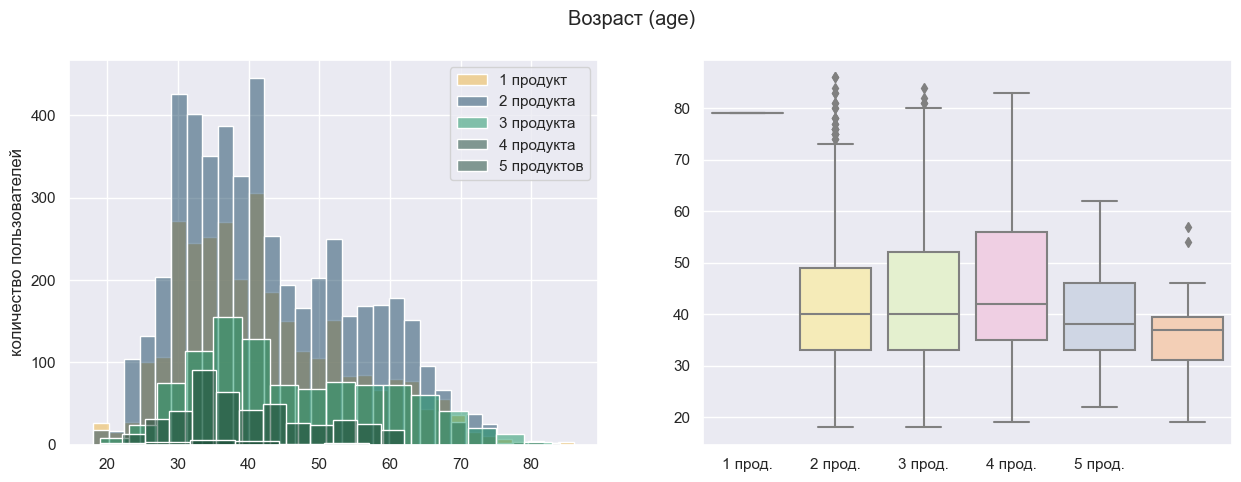

C:\Users\User\AppData\Local\Temp\ipykernel_8252\483383645.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.histplot(df[df['products']==1][col], label = '1 продукт', color = '#EFC87B', ax = plt.subplot(1, 2, 1))


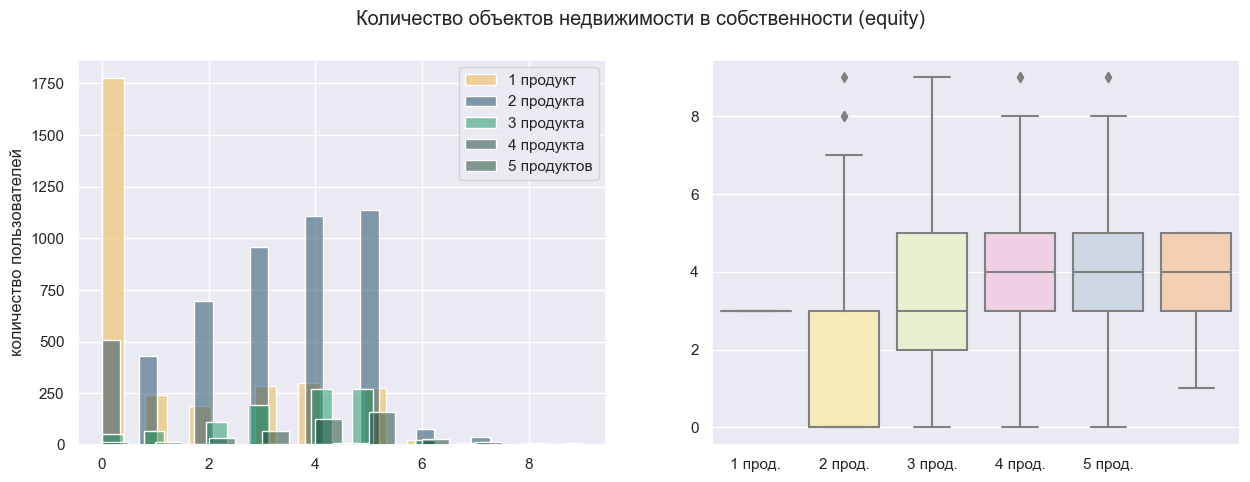

C:\Users\User\AppData\Local\Temp\ipykernel_8252\483383645.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.histplot(df[df['products']==1][col], label = '1 продукт', color = '#EFC87B', ax = plt.subplot(1, 2, 1))


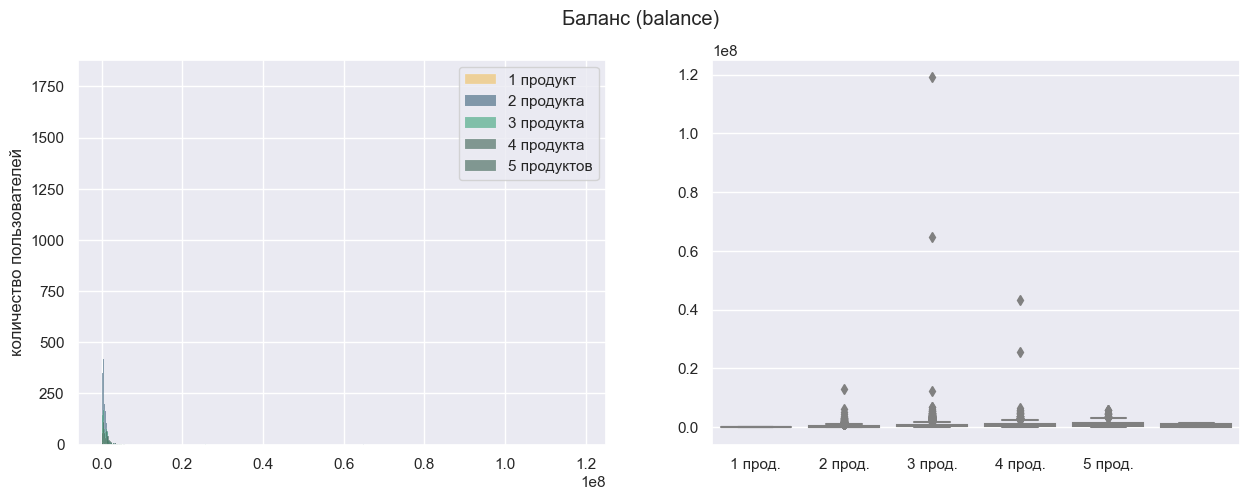

C:\Users\User\AppData\Local\Temp\ipykernel_8252\483383645.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  sns.histplot(df[df['products']==1][col], label = '1 продукт', color = '#EFC87B', ax = plt.subplot(1, 2, 1))


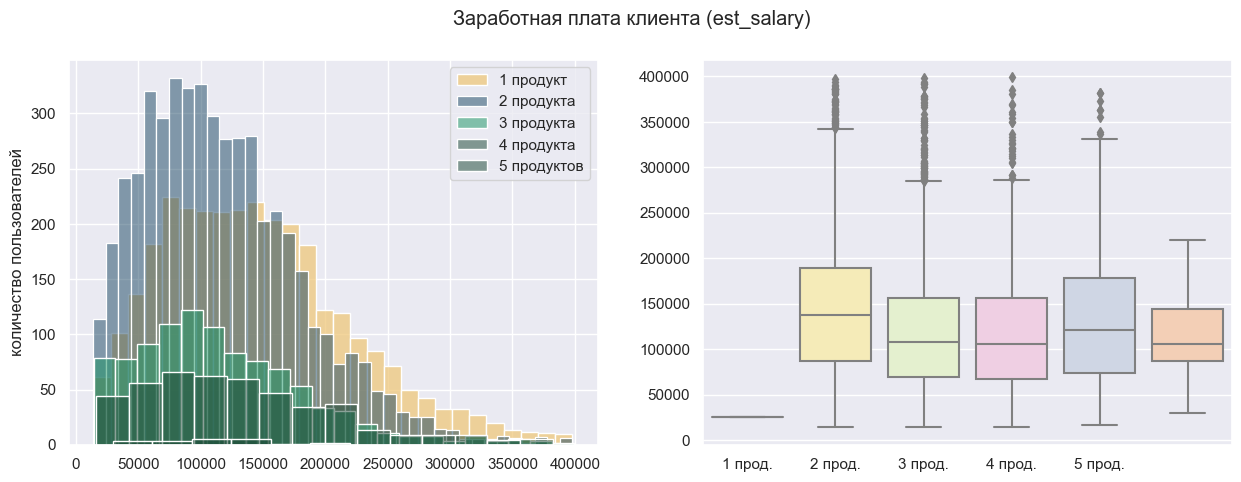

In [80]:
for index, row in numeric.iterrows():
    numeric_plots(df, row[0], row[1])

Рассмотрим, как распределены клиенты по признакам, которые пользуются  1 продуктом.

В основном представлены клиенты от 29 до 45 лет. Больше всего представлено клиентов из Ярославля. Среди клиентов больше мужчин. У большинства есть кредитная карта. Клиенты активны и не ушли в другой банк. Большинство не имеют недвижимости. Большинство имеют высокую заработную плату и высокий уровень баллов кредитного скоринга. У большинства либо нет данных о балансе либо имеют средний баланс.

Рассмотрим, как распределены клиенты по признакам, которые пользуются  2 продуктами.

В основном представлены клиенты от 29 до 44 лет. Больше всего клиентов из Ярославля. Больше всего представлено женщин. У большинства клиентов есть кредитная карта. В основном клиенты активны и не ушли в другой банк. Клиенты имеют 5 объектов в собственности. Большинство клиентов имеют среднюю заработную плату и уровень кредитного скоринга выше среднего. У большинства клиентов средний баланс на счёте.

Рассмотрим, как распределены клиенты по признакам, которые пользуются  3 продуктами.

Самые многочисленные клиенты от 32 до 41 года. Большинство клиентов из Ярославля. Большинство клиентов женщины. У большинства нет кредитной карты и они не активны. Большинство остались клиентами банка, значительная часть клиентов ушла в другой банк. В основном клиенты имеют 4 или 5 объектов в собственности. Зарплата в основном средняя или ниже среднего. Уровень баллов кредитного скоринга в основном низкий или средний. Имеют высокий или средний баланс на счёте.

Рассмотрим, как распределены клиенты по признакам, которые пользуются  4 продуктами

Больше всего представлено клиентов от 32 до 37 лет. большинство клиентов представлено из Ярославля. Наибольшую долю имеют мужчины. У большинства есть кредитная карта. Большинство клиентов были активны. большинство клиентов ушло в другой банк. Большинство имеет 5 или 4 объектов в собственности. большинство имеет либо высокую либо среднюю заработную плату. Уровень кредитного скоринга выше среднего. большинство клиентов имеют высокий баланс на счете.

Рассмотрим, как распределены клиенты по признакам, которые пользуются 5 продуктами

Большинство клиентов представлено из Ярославля. Наибольшую долю имеют мужчины. У большинства есть кредитная карта. Большинство клиентов были активны. большинство клиентов ушло в другой банк. Большинство имеет 5 или 4 объектов в собственности. большинство имеет либо высокую либо среднюю заработную плату. Уровень кредитного скоринга выше среднего. большинство клиентов имеют высокий баланс на счете.

#### Описание портретов получившихся сегментов

Сегмент 1

В основном представлены клиенты от 29 до 45 лет. Больше всего представлено клиентов из Ярославля. Среди клиентов больше мужчин. У большинства есть кредитная карта. Клиенты активны и не ушли в другой банк. Большинство не имеют недвижимости. Большинство имеют высокую заработную плату и высокий уровень баллов кредитного скоринга. У большинства либо нет данных о балансе либо имеют средний баланс.

Сегмент 2

В основном представлены клиенты от 29 до 44 лет. Больше всего клиентов из Ярославля. Больше всего представлено женщин. У большинства клиентов есть кредитная карта. В основном клиенты активны и не ушли в другой банк. Клиенты имеют 5 объектов в собственности. Большинство клиентов имеют среднюю заработную плату и уровень кредитного скоринга выше среднего. У большинства клиентов средний баланс на счёте.

Сегмент 3

Самые многочисленные клиенты от 32 до 41 года. Большинство клиентов из Ярославля. Большинство клиентов женщины. У большинства нет кредитной карты и они не активны. Большинство остались клиентами банка, значительная часть клиентов ушла в другой банк. В основном клиенты имеют 4 или 5 объектов в собственности. Зарплата в основном средняя или ниже среднего. Уровень баллов кредитного скоринга в основном низкий или средний. Имеют высокий или средний баланс на счёте.

Сегмент 4

Клиентов, которые пользуется 4 и 5 продуктами можно объединить в один сегмент.

Больше всего представлено клиентов от 32 до 37 лет. Большинство клиентов представлено из г. Ярославля. Наибольшую долю имеют мужчины. У большинства есть кредитная карта. Большинство клиентов были активны. Большинство клиентов ушло в другой банк. Большинство имеет 5 или 4 объектов в собственности. Большинство имеет либо высокую либо среднюю заработную плату. Уровень кредитного скоринга выше среднего. Большинство клиентов имеют высокий баланс на счете.

#### **Вывод о сегментации пользователей** 

Всего было получено 4 сегмента в зависимости от количества используемых продуктов.

### Статистическая проверка гипотез

#### Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

 Чтобы проверить, есть ли разница в возрасте между клиентами, которые пользуются двумя продуктами и теми, кто пользуется только одним продуктом будем использовать  двухвыборочный t-тест. 
Сформулируем нулевую и альтернативную гипотезы:
Нулевая гипотеза:  средний возраст клиентов, пользующихся одним продуктом банка равен среднему возрасту клиентов, пользующихся двумя продуктами банка.
Альтернативная гипотеза: средний возраст клиентов, пользующихся одним продуктом банка не равен среднему возрасту клиентов, пользующихся двумя продуктами.

Чтобы определить, действительно ли эта разница является статистически значимой  укажем критический уровень значимости  alpha = 0.05, что означает, что вероятность ошибки первого рода (отвергнуть нулевую гипотезу, когда она верна) должна быть меньше 5%.

Далее вычислим p-значение. Если p-значение меньше alpha, то  можно отвергнуть нулевую гипотезу и сделать вывод, что возраст клиентов, пользующихся одним продуктом банка не равен возрасту клиентов, пользующихся двумя продуктами.



In [81]:
prod_1 = df[(df['products']==1)]['age']
prod_2 = df[(df['products']==2)]['age']


In [82]:
results = st.ttest_ind(prod_1, prod_2, equal_var=False) # тест двухвыборочный

alpha = 0.05 # критический уровень статистической значимости

print('p-value = {0:.3f}'.format(results.pvalue))  
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value = 0.034
Отвергаем нулевую гипотезу


P-значение равно 0.034, что меньше alpha = 0.05. Это означает, что нулевая гипотеза может быть отвергнута и можно сделать вывод о том, что средний возраст клиентов, пользующихся одним продуктом банка не равен среднему возрасту клиентов, пользующихся двумя продуктами.

#### **Вывод о проведенной статистической проверки гипотезы** 

В результате проведенной статистической проверки гипотезы можно сделать вывод:
1. Средний возраст клиентов, пользующихся одним продуктом банка не равен среднему возрасту клиентов, пользующихся двумя продуктами.


### Выводы и рекомендации по удержанию пользователей

Рекомендации для удержанию пользователей

Для сегмента 1. 

1. Для клиентов с одним продуктом: предлагать активно дополнительный продукт, поскольку клиенты уже имеют кредитную карту и лояльны к банку. Таким продуктом может стать ипотека. Так как у большинства нет недвижимости и они имеют высокую заработную плату, высокий уровень баллов кредитного скоринга и сбережения.  Разработать новый продукт для клиентов с  низким уровнем баллов кредитного скоринга, поскольку это вторая по величине часть клиентов с таким рейтингом в этом сегменте.


Для сегмента 2. 

2. Для клиентов с двумя продуктами: учитывать специфику половой принадлежности данного сегмента и разрабатывать продукты именно для женщин, активно предлагать их и повышать лояльность этого сегмента клиентов. Так же необходимо  стимулировать открывать вклады, так как у большинства средний либо высокий баланс на счете.

Для сегмента 3. 

3. Для клиентов с тремя продуктами: проводить детальный анализ продуктов, которые используются клиентами, и выяснять причины ухода клиентов из банка.  Активно предлагать дополнительный продукт в виде кредитной карты. Повышать лояльность. Так же необходимо стимулировать открывать вклады, так как у большинства средний либо высокий баланс на счете.

Для сегмента 4. 

4. Для клиентов с четырьмя и пятью продуктами: проанализировать используемые клиентами продукты и выявить причины их ухода из банка. Повышать лояльность. Так же необходимо  стимулировать открывать вклады, так как у большинства высокий баланс на счете. 



 

Ссылка на дашборд

https://public.tableau.com/views/Dachbord2GusevV_S_/sheet1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

Ссылка на презентацию

https://disk.yandex.ru/i/CMwEyYQzwpNofw